In [1]:
import os 
import sys
from tqdm import tqdm
import importlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

module_path = '/home/lun/project-basileus/seq-gan/sgtlstm'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
if 'sgtlstm' in sys.modules:
    importlib.reload(sys.modules['sgtlstm'])

# from sgtlstm.utils import load_fixed_length_sequence_from_pickle, create_dataset
from sgtlstm.utils import create_dataset
from sgtlstm.SeqGan import build_G, build_D
from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

## Load data 

In [7]:
valid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/valid_sequences.pickle'
invalid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/invalid_sequences.pickle'

valid_event_type_seqs, valid_timestamp_seqs = load_fixed_length_sequence_from_pickle(valid_data_path, to_timedelta=True, end_token=0)
invalid_event_type_seqs, invalid_timestamp_seqs = load_fixed_length_sequence_from_pickle(invalid_data_path, to_timedelta=True, end_token=0)

## Global Variables 

In [8]:
BATCH_SIZE = 128
T = 10 + 1
VOCAB = ['END/PADDING', 'INIT', 'start', 'click', 'install']
EVENT_VOCAB_DIM = len(VOCAB)
EMB_DIM = 5
HIDDEN_DIM = 64
K_MIST = 7

END_TOKEN = 0
MAX_TIME = 1024

## G and D

In [66]:
# generator = build_G(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST,
#     return_sequence=False,
# )


# discriminator = build_D(
#     T = T,
#     event_vocab_dim = EVENT_VOCAB_DIM,
#     emb_dim = EMB_DIM,
#     hidden_dim= HIDDEN_DIM,
#     k_mixt = K_MIST
# )

## Pretrain G

In [67]:
pretrain_G_et = valid_event_type_seqs
pretrain_G_ts = valid_timestamp_seqs
pretrain_G_labels = np.ones((valid_event_type_seqs.shape[0], 1))

pretrain_G_features = (pretrain_G_et, pretrain_G_ts)
N_pretrain_G = pretrain_G_et.shape[0]

In [68]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

N_total = pretrain_labels.shape[0]
EPOCHS = 1
_TOTAL_STEPS = 1000

pretrain_G_dataset = create_dataset(pretrain_G_features,
                                  pretrain_G_labels,
                                  batch_size=1,
                                  epochs=1,
                                  buffer_size=N_pretrain_G)

pretrained_generator = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/lun/.conda/envs/tf2_py37/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py", line 4133, in <genexpr>
    for ta, out in zip(output_ta_t, flat_new_output))  File "/home/lun/.conda/envs/tf2_py37/lib/python3.7/site-packages/tensorflow_core/python/util/tf_should_use.py", line 237, in wrapped
    error_in_funct

In [69]:
pretrain_gen_ce_loss_history = []
pretrain_gen_gaussian_loss_history = []
step = 0

for feature_sample, _ in tqdm(pretrain_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    gen_ce_loss, gen_gaussian_loss =  pretrain_generator(feature_sample, 
                                                         pretrain_G_dataset,
                                                         event_vocab_dim=EVENT_VOCAB_DIM, 
                                                         verbose=False, 
                                                         weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, 
                                                         optimizer=OPTIMIZER)
        
    pretrain_gen_ce_loss_history.append(gen_ce_loss.numpy())
    pretrain_gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

1it [00:02,  2.13s/it]

Training Step: 2


2it [00:03,  1.91s/it]

Training Step: 3


3it [00:05,  1.83s/it]

Training Step: 4


4it [00:06,  1.72s/it]

Training Step: 5


5it [00:08,  1.69s/it]

Training Step: 6


6it [00:09,  1.61s/it]

Training Step: 7


7it [00:11,  1.62s/it]

Training Step: 8


8it [00:12,  1.57s/it]

Training Step: 9


9it [00:14,  1.52s/it]

Training Step: 10


10it [00:15,  1.56s/it]

Training Step: 11


11it [00:17,  1.52s/it]

Training Step: 12


12it [00:18,  1.56s/it]

Training Step: 13


13it [00:20,  1.52s/it]

Training Step: 14


14it [00:21,  1.49s/it]

Training Step: 15


15it [00:23,  1.54s/it]

Training Step: 16


16it [00:24,  1.52s/it]

Training Step: 17


17it [00:26,  1.56s/it]

Training Step: 18


18it [00:27,  1.52s/it]

Training Step: 19


19it [00:29,  1.49s/it]

Training Step: 20


20it [00:31,  1.55s/it]

Training Step: 21


21it [00:32,  1.53s/it]

Training Step: 22


22it [00:33,  1.50s/it]

Training Step: 23


23it [00:35,  1.54s/it]

Training Step: 24


24it [00:37,  1.50s/it]

Training Step: 25


25it [00:38,  1.55s/it]

Training Step: 26


26it [00:40,  1.51s/it]

Training Step: 27


27it [00:41,  1.49s/it]

Training Step: 28


28it [00:43,  1.54s/it]

Training Step: 29


29it [00:44,  1.51s/it]

Training Step: 30


30it [00:46,  1.55s/it]

Training Step: 31


31it [00:47,  1.52s/it]

Training Step: 32


32it [00:49,  1.57s/it]

Training Step: 33


33it [00:50,  1.54s/it]

Training Step: 34


34it [00:52,  1.53s/it]

Training Step: 35


35it [00:54,  1.60s/it]

Training Step: 36


36it [00:55,  1.58s/it]

Training Step: 37


37it [00:57,  1.64s/it]

Training Step: 38


38it [00:58,  1.60s/it]

Training Step: 39


39it [01:00,  1.57s/it]

Training Step: 40


40it [01:02,  1.60s/it]

Training Step: 41


41it [01:03,  1.56s/it]

Training Step: 42


42it [01:05,  1.59s/it]

Training Step: 43


43it [01:06,  1.55s/it]

Training Step: 44


44it [01:08,  1.52s/it]

Training Step: 45


45it [01:09,  1.57s/it]

Training Step: 46


46it [01:11,  1.54s/it]

Training Step: 47


47it [01:13,  1.58s/it]

Training Step: 48


48it [01:14,  1.54s/it]

Training Step: 49


49it [01:15,  1.51s/it]

Training Step: 50


50it [01:17,  1.57s/it]

Training Step: 51


51it [01:19,  1.53s/it]

Training Step: 52


52it [01:20,  1.59s/it]

Training Step: 53


53it [01:22,  1.55s/it]

Training Step: 54


54it [01:23,  1.52s/it]

Training Step: 55


55it [01:25,  1.56s/it]

Training Step: 56


56it [01:26,  1.52s/it]

Training Step: 57


57it [01:28,  1.56s/it]

Training Step: 58


58it [01:29,  1.52s/it]

Training Step: 59


59it [01:31,  1.50s/it]

Training Step: 60


60it [01:32,  1.54s/it]

Training Step: 61


61it [01:34,  1.50s/it]

Training Step: 62


62it [01:35,  1.54s/it]

Training Step: 63


63it [01:37,  1.51s/it]

Training Step: 64


64it [01:38,  1.48s/it]

Training Step: 65


65it [01:40,  1.53s/it]

Training Step: 66


66it [01:41,  1.50s/it]

Training Step: 67


67it [01:43,  1.54s/it]

Training Step: 68


68it [01:44,  1.51s/it]

Training Step: 69


69it [01:46,  1.49s/it]

Training Step: 70


70it [01:48,  1.54s/it]

Training Step: 71


71it [01:49,  1.51s/it]

Training Step: 72


72it [01:50,  1.48s/it]

Training Step: 73


73it [01:52,  1.53s/it]

Training Step: 74


74it [01:53,  1.50s/it]

Training Step: 75


75it [01:55,  1.54s/it]

Training Step: 76


76it [01:57,  1.51s/it]

Training Step: 77


77it [01:58,  1.48s/it]

Training Step: 78


78it [02:00,  1.53s/it]

Training Step: 79


79it [02:01,  1.50s/it]

Training Step: 80


80it [02:03,  1.54s/it]

Training Step: 81


81it [02:04,  1.50s/it]

Training Step: 82


82it [02:06,  1.54s/it]

Training Step: 83


83it [02:07,  1.50s/it]

Training Step: 84


84it [02:09,  1.47s/it]

Training Step: 85


85it [02:10,  1.52s/it]

Training Step: 86


86it [02:12,  1.50s/it]

Training Step: 87


87it [02:13,  1.56s/it]

Training Step: 88


88it [02:15,  1.55s/it]

Training Step: 89


89it [02:16,  1.53s/it]

Training Step: 90


90it [02:18,  1.58s/it]

Training Step: 91


91it [02:19,  1.53s/it]

Training Step: 92


92it [02:21,  1.56s/it]

Training Step: 93


93it [02:22,  1.52s/it]

Training Step: 94


94it [02:24,  1.49s/it]

Training Step: 95


95it [02:26,  1.53s/it]

Training Step: 96


96it [02:27,  1.50s/it]

Training Step: 97


97it [02:29,  1.54s/it]

Training Step: 98


98it [02:30,  1.51s/it]

Training Step: 99


99it [02:31,  1.48s/it]

Training Step: 100


100it [02:33,  1.53s/it]

Training Step: 101


101it [02:35,  1.49s/it]

Training Step: 102


102it [02:36,  1.54s/it]

Training Step: 103


103it [02:38,  1.50s/it]

Training Step: 104


104it [02:39,  1.49s/it]

Training Step: 105


105it [02:41,  1.53s/it]

Training Step: 106


106it [02:42,  1.49s/it]

Training Step: 107


107it [02:44,  1.54s/it]

Training Step: 108


108it [02:45,  1.51s/it]

Training Step: 109


109it [02:47,  1.49s/it]

Training Step: 110


110it [02:48,  1.53s/it]

Training Step: 111


111it [02:50,  1.50s/it]

Training Step: 112


112it [02:51,  1.54s/it]

Training Step: 113


113it [02:53,  1.50s/it]

Training Step: 114


114it [02:54,  1.47s/it]

Training Step: 115


115it [02:56,  1.52s/it]

Training Step: 116


116it [02:57,  1.49s/it]

Training Step: 117


117it [02:59,  1.53s/it]

Training Step: 118


118it [03:00,  1.50s/it]

Training Step: 119


119it [03:02,  1.47s/it]

Training Step: 120


120it [03:03,  1.52s/it]

Training Step: 121


121it [03:05,  1.49s/it]

Training Step: 122


122it [03:06,  1.46s/it]

Training Step: 123


123it [03:08,  1.51s/it]

Training Step: 124


124it [03:09,  1.47s/it]

Training Step: 125


125it [03:11,  1.52s/it]

Training Step: 126


126it [03:12,  1.48s/it]

Training Step: 127


127it [03:14,  1.46s/it]

Training Step: 128


128it [03:15,  1.51s/it]

Training Step: 129


129it [03:17,  1.48s/it]

Training Step: 130


130it [03:18,  1.53s/it]

Training Step: 131


131it [03:20,  1.50s/it]

Training Step: 132


132it [03:21,  1.54s/it]

Training Step: 133


133it [03:23,  1.50s/it]

Training Step: 134


134it [03:24,  1.48s/it]

Training Step: 135


135it [03:26,  1.52s/it]

Training Step: 136


136it [03:27,  1.50s/it]

Training Step: 137


137it [03:29,  1.55s/it]

Training Step: 138


138it [03:30,  1.51s/it]

Training Step: 139


139it [03:32,  1.49s/it]

Training Step: 140


140it [03:33,  1.54s/it]

Training Step: 141


141it [03:35,  1.50s/it]

Training Step: 142


142it [03:36,  1.55s/it]

Training Step: 143


143it [03:38,  1.50s/it]

Training Step: 144


144it [03:39,  1.48s/it]

Training Step: 145


145it [03:41,  1.53s/it]

Training Step: 146


146it [03:42,  1.49s/it]

Training Step: 147


147it [03:44,  1.53s/it]

Training Step: 148


148it [03:45,  1.50s/it]

Training Step: 149


149it [03:47,  1.48s/it]

Training Step: 150


150it [03:48,  1.53s/it]

Training Step: 151


151it [03:50,  1.50s/it]

Training Step: 152


152it [03:52,  1.55s/it]

Training Step: 153


153it [03:53,  1.51s/it]

Training Step: 154


154it [03:54,  1.48s/it]

Training Step: 155


155it [03:56,  1.53s/it]

Training Step: 156


156it [03:57,  1.50s/it]

Training Step: 157


157it [03:59,  1.54s/it]

Training Step: 158


158it [04:00,  1.50s/it]

Training Step: 159


159it [04:02,  1.47s/it]

Training Step: 160


160it [04:03,  1.52s/it]

Training Step: 161


161it [04:05,  1.48s/it]

Training Step: 162


162it [04:07,  1.53s/it]

Training Step: 163


163it [04:08,  1.50s/it]

Training Step: 164


164it [04:09,  1.47s/it]

Training Step: 165


165it [04:11,  1.51s/it]

Training Step: 166


166it [04:12,  1.48s/it]

Training Step: 167


167it [04:14,  1.53s/it]

Training Step: 168


168it [04:15,  1.49s/it]

Training Step: 169


169it [04:17,  1.47s/it]

Training Step: 170


170it [04:19,  1.53s/it]

Training Step: 171


171it [04:20,  1.49s/it]

Training Step: 172


172it [04:21,  1.46s/it]

Training Step: 173


173it [04:23,  1.51s/it]

Training Step: 174


174it [04:24,  1.47s/it]

Training Step: 175


175it [04:26,  1.52s/it]

Training Step: 176


176it [04:27,  1.48s/it]

Training Step: 177


177it [04:29,  1.46s/it]

Training Step: 178


178it [04:30,  1.50s/it]

Training Step: 179


179it [04:32,  1.48s/it]

Training Step: 180


180it [04:33,  1.53s/it]

Training Step: 181


181it [04:35,  1.49s/it]

Training Step: 182


182it [04:36,  1.53s/it]

Training Step: 183


183it [04:38,  1.49s/it]

Training Step: 184


184it [04:39,  1.47s/it]

Training Step: 185


185it [04:41,  1.51s/it]

Training Step: 186


186it [04:42,  1.48s/it]

Training Step: 187


187it [04:44,  1.52s/it]

Training Step: 188


188it [04:45,  1.49s/it]

Training Step: 189


189it [04:47,  1.47s/it]

Training Step: 190


190it [04:48,  1.54s/it]

Training Step: 191


191it [04:50,  1.50s/it]

Training Step: 192


192it [04:51,  1.47s/it]

Training Step: 193


193it [04:53,  1.52s/it]

Training Step: 194


194it [04:54,  1.50s/it]

Training Step: 195


195it [04:56,  1.54s/it]

Training Step: 196


196it [04:57,  1.50s/it]

Training Step: 197


197it [04:59,  1.47s/it]

Training Step: 198


198it [05:00,  1.52s/it]

Training Step: 199


199it [05:02,  1.49s/it]

Training Step: 200


200it [05:03,  1.53s/it]

Training Step: 201


201it [05:05,  1.50s/it]

Training Step: 202


202it [05:06,  1.47s/it]

Training Step: 203


203it [05:08,  1.52s/it]

Training Step: 204


204it [05:09,  1.49s/it]

Training Step: 205


205it [05:11,  1.53s/it]

Training Step: 206


206it [05:12,  1.49s/it]

Training Step: 207


207it [05:14,  1.47s/it]

Training Step: 208


208it [05:15,  1.52s/it]

Training Step: 209


209it [05:17,  1.49s/it]

Training Step: 210


210it [05:19,  1.55s/it]

Training Step: 211


211it [05:20,  1.52s/it]

Training Step: 212


212it [05:21,  1.49s/it]

Training Step: 213


213it [05:23,  1.54s/it]

Training Step: 214


214it [05:24,  1.50s/it]

Training Step: 215


215it [05:26,  1.54s/it]

Training Step: 216


216it [05:28,  1.50s/it]

Training Step: 217


217it [05:29,  1.48s/it]

Training Step: 218


218it [05:31,  1.52s/it]

Training Step: 219


219it [05:32,  1.49s/it]

Training Step: 220


220it [05:34,  1.53s/it]

Training Step: 221


221it [05:35,  1.50s/it]

Training Step: 222


222it [05:36,  1.47s/it]

Training Step: 223


223it [05:38,  1.52s/it]

Training Step: 224


224it [05:39,  1.48s/it]

Training Step: 225


225it [05:41,  1.53s/it]

Training Step: 226


226it [05:42,  1.49s/it]

Training Step: 227


227it [05:44,  1.53s/it]

Training Step: 228


228it [05:46,  1.50s/it]

Training Step: 229


229it [05:47,  1.48s/it]

Training Step: 230


230it [05:49,  1.53s/it]

Training Step: 231


231it [05:50,  1.51s/it]

Training Step: 232


232it [05:52,  1.49s/it]

Training Step: 233


233it [05:53,  1.55s/it]

Training Step: 234


234it [05:55,  1.53s/it]

Training Step: 235


235it [05:56,  1.58s/it]

Training Step: 236


236it [05:58,  1.54s/it]

Training Step: 237


237it [05:59,  1.52s/it]

Training Step: 238


238it [06:01,  1.59s/it]

Training Step: 239


239it [06:03,  1.57s/it]

Training Step: 240


240it [06:04,  1.63s/it]

Training Step: 241


241it [06:06,  1.60s/it]

Training Step: 242


242it [06:07,  1.58s/it]

Training Step: 243


243it [06:09,  1.63s/it]

Training Step: 244


244it [06:11,  1.59s/it]

Training Step: 245


245it [06:12,  1.63s/it]

Training Step: 246


246it [06:14,  1.58s/it]

Training Step: 247


247it [06:15,  1.55s/it]

Training Step: 248


248it [06:17,  1.59s/it]

Training Step: 249


249it [06:18,  1.55s/it]

Training Step: 250


250it [06:20,  1.59s/it]

Training Step: 251


251it [06:22,  1.55s/it]

Training Step: 252


252it [06:23,  1.52s/it]

Training Step: 253


253it [06:25,  1.56s/it]

Training Step: 254


254it [06:26,  1.52s/it]

Training Step: 255


255it [06:28,  1.55s/it]

Training Step: 256


256it [06:29,  1.52s/it]

Training Step: 257


257it [06:31,  1.49s/it]

Training Step: 258


258it [06:32,  1.54s/it]

Training Step: 259


259it [06:34,  1.50s/it]

Training Step: 260


260it [06:35,  1.55s/it]

Training Step: 261


261it [06:37,  1.51s/it]

Training Step: 262


262it [06:38,  1.49s/it]

Training Step: 263


263it [06:40,  1.53s/it]

Training Step: 264


264it [06:41,  1.50s/it]

Training Step: 265


265it [06:43,  1.55s/it]

Training Step: 266


266it [06:44,  1.51s/it]

Training Step: 267


267it [06:46,  1.56s/it]

Training Step: 268


268it [06:47,  1.52s/it]

Training Step: 269


269it [06:49,  1.49s/it]

Training Step: 270


270it [06:51,  1.54s/it]

Training Step: 271


271it [06:52,  1.50s/it]

Training Step: 272


272it [06:53,  1.48s/it]

Training Step: 273


273it [06:55,  1.53s/it]

Training Step: 274


274it [06:56,  1.50s/it]

Training Step: 275


275it [06:58,  1.55s/it]

Training Step: 276


276it [07:00,  1.51s/it]

Training Step: 277


277it [07:01,  1.48s/it]

Training Step: 278


278it [07:03,  1.53s/it]

Training Step: 279


279it [07:04,  1.50s/it]

Training Step: 280


280it [07:06,  1.54s/it]

Training Step: 281


281it [07:07,  1.50s/it]

Training Step: 282


282it [07:08,  1.48s/it]

Training Step: 283


283it [07:10,  1.52s/it]

Training Step: 284


284it [07:12,  1.49s/it]

Training Step: 285


285it [07:13,  1.54s/it]

Training Step: 286


286it [07:15,  1.51s/it]

Training Step: 287


287it [07:16,  1.49s/it]

Training Step: 288


288it [07:18,  1.54s/it]

Training Step: 289


289it [07:19,  1.52s/it]

Training Step: 290


290it [07:21,  1.58s/it]

Training Step: 291


291it [07:22,  1.55s/it]

Training Step: 292


292it [07:24,  1.53s/it]

Training Step: 293


293it [07:26,  1.56s/it]

Training Step: 294


294it [07:27,  1.52s/it]

Training Step: 295


295it [07:29,  1.56s/it]

Training Step: 296


296it [07:30,  1.51s/it]

Training Step: 297


297it [07:31,  1.49s/it]

Training Step: 298


298it [07:33,  1.54s/it]

Training Step: 299


299it [07:34,  1.49s/it]

Training Step: 300


300it [07:36,  1.54s/it]

Training Step: 301


301it [07:38,  1.50s/it]

Training Step: 302


302it [07:39,  1.48s/it]

Training Step: 303


303it [07:41,  1.52s/it]

Training Step: 304


304it [07:42,  1.48s/it]

Training Step: 305


305it [07:44,  1.52s/it]

Training Step: 306


306it [07:45,  1.48s/it]

Training Step: 307


307it [07:47,  1.52s/it]

Training Step: 308


308it [07:48,  1.48s/it]

Training Step: 309


309it [07:49,  1.46s/it]

Training Step: 310


310it [07:51,  1.50s/it]

Training Step: 311


311it [07:52,  1.47s/it]

Training Step: 312


312it [07:54,  1.44s/it]

Training Step: 313


313it [07:55,  1.49s/it]

Training Step: 314


314it [07:57,  1.45s/it]

Training Step: 315


315it [07:58,  1.50s/it]

Training Step: 316


316it [08:00,  1.47s/it]

Training Step: 317


317it [08:01,  1.45s/it]

Training Step: 318


318it [08:03,  1.49s/it]

Training Step: 319


319it [08:04,  1.46s/it]

Training Step: 320


320it [08:06,  1.51s/it]

Training Step: 321


321it [08:07,  1.47s/it]

Training Step: 322


322it [08:08,  1.44s/it]

Training Step: 323


323it [08:10,  1.48s/it]

Training Step: 324


324it [08:11,  1.45s/it]

Training Step: 325


325it [08:13,  1.50s/it]

Training Step: 326


326it [08:14,  1.47s/it]

Training Step: 327


327it [08:16,  1.44s/it]

Training Step: 328


328it [08:17,  1.49s/it]

Training Step: 329


329it [08:19,  1.46s/it]

Training Step: 330


330it [08:20,  1.50s/it]

Training Step: 331


331it [08:22,  1.46s/it]

Training Step: 332


332it [08:23,  1.43s/it]

Training Step: 333


333it [08:25,  1.48s/it]

Training Step: 334


334it [08:26,  1.44s/it]

Training Step: 335


335it [08:27,  1.42s/it]

Training Step: 336


336it [08:29,  1.47s/it]

Training Step: 337


337it [08:30,  1.45s/it]

Training Step: 338


338it [08:32,  1.49s/it]

Training Step: 339


339it [08:33,  1.45s/it]

Training Step: 340


340it [08:35,  1.43s/it]

Training Step: 341


341it [08:36,  1.47s/it]

Training Step: 342


342it [08:38,  1.44s/it]

Training Step: 343


343it [08:39,  1.48s/it]

Training Step: 344


344it [08:41,  1.45s/it]

Training Step: 345


345it [08:42,  1.49s/it]

Training Step: 346


346it [08:44,  1.45s/it]

Training Step: 347


347it [08:45,  1.43s/it]

Training Step: 348


348it [08:47,  1.49s/it]

Training Step: 349


349it [08:48,  1.45s/it]

Training Step: 350


350it [08:49,  1.43s/it]

Training Step: 351


351it [08:51,  1.47s/it]

Training Step: 352


352it [08:52,  1.44s/it]

Training Step: 353


353it [08:54,  1.49s/it]

Training Step: 354


354it [08:55,  1.45s/it]

Training Step: 355


355it [08:57,  1.43s/it]

Training Step: 356


356it [08:58,  1.48s/it]

Training Step: 357


357it [09:00,  1.45s/it]

Training Step: 358


358it [09:01,  1.50s/it]

Training Step: 359


359it [09:03,  1.46s/it]

Training Step: 360


360it [09:04,  1.44s/it]

Training Step: 361


361it [09:06,  1.48s/it]

Training Step: 362


362it [09:07,  1.45s/it]

Training Step: 363


363it [09:08,  1.49s/it]

Training Step: 364


364it [09:10,  1.45s/it]

Training Step: 365


365it [09:11,  1.42s/it]

Training Step: 366


366it [09:13,  1.47s/it]

Training Step: 367


367it [09:14,  1.44s/it]

Training Step: 368


368it [09:16,  1.49s/it]

Training Step: 369


369it [09:17,  1.46s/it]

Training Step: 370


370it [09:19,  1.43s/it]

Training Step: 371


371it [09:20,  1.48s/it]

Training Step: 372


372it [09:21,  1.45s/it]

Training Step: 373


373it [09:23,  1.42s/it]

Training Step: 374


374it [09:24,  1.46s/it]

Training Step: 375


375it [09:26,  1.43s/it]

Training Step: 376


376it [09:27,  1.48s/it]

Training Step: 377


377it [09:29,  1.45s/it]

Training Step: 378


378it [09:30,  1.43s/it]

Training Step: 379


379it [09:32,  1.48s/it]

Training Step: 380


380it [09:33,  1.45s/it]

Training Step: 381


381it [09:35,  1.51s/it]

Training Step: 382


382it [09:36,  1.46s/it]

Training Step: 383


383it [09:38,  1.50s/it]

Training Step: 384


384it [09:39,  1.46s/it]

Training Step: 385


385it [09:40,  1.43s/it]

Training Step: 386


386it [09:42,  1.48s/it]

Training Step: 387


387it [09:43,  1.44s/it]

Training Step: 388


388it [09:45,  1.43s/it]

Training Step: 389


389it [09:46,  1.48s/it]

Training Step: 390


390it [09:48,  1.45s/it]

Training Step: 391


391it [09:49,  1.50s/it]

Training Step: 392


392it [09:51,  1.46s/it]

Training Step: 393


393it [09:52,  1.43s/it]

Training Step: 394


394it [09:54,  1.48s/it]

Training Step: 395


395it [09:55,  1.44s/it]

Training Step: 396


396it [09:57,  1.48s/it]

Training Step: 397


397it [09:58,  1.45s/it]

Training Step: 398


398it [09:59,  1.42s/it]

Training Step: 399


399it [10:01,  1.47s/it]

Training Step: 400


400it [10:02,  1.44s/it]

Training Step: 401


401it [10:04,  1.49s/it]

Training Step: 402


402it [10:05,  1.45s/it]

Training Step: 403


403it [10:07,  1.43s/it]

Training Step: 404


404it [10:08,  1.47s/it]

Training Step: 405


405it [10:10,  1.44s/it]

Training Step: 406


406it [10:11,  1.48s/it]

Training Step: 407


407it [10:13,  1.45s/it]

Training Step: 408


408it [10:14,  1.42s/it]

Training Step: 409


409it [10:15,  1.48s/it]

Training Step: 410


410it [10:17,  1.45s/it]

Training Step: 411


411it [10:18,  1.43s/it]

Training Step: 412


412it [10:20,  1.47s/it]

Training Step: 413


413it [10:21,  1.44s/it]

Training Step: 414


414it [10:23,  1.48s/it]

Training Step: 415


415it [10:24,  1.45s/it]

Training Step: 416


416it [10:26,  1.42s/it]

Training Step: 417


417it [10:27,  1.47s/it]

Training Step: 418


418it [10:28,  1.44s/it]

Training Step: 419


419it [10:30,  1.48s/it]

Training Step: 420


420it [10:31,  1.45s/it]

Training Step: 421


421it [10:33,  1.49s/it]

Training Step: 422


422it [10:34,  1.45s/it]

Training Step: 423


423it [10:36,  1.43s/it]

Training Step: 424


424it [10:37,  1.47s/it]

Training Step: 425


425it [10:39,  1.44s/it]

Training Step: 426


426it [10:40,  1.42s/it]

Training Step: 427


427it [10:42,  1.46s/it]

Training Step: 428


428it [10:43,  1.43s/it]

Training Step: 429


429it [10:45,  1.48s/it]

Training Step: 430


430it [10:46,  1.45s/it]

Training Step: 431


431it [10:47,  1.43s/it]

Training Step: 432


432it [10:49,  1.47s/it]

Training Step: 433


433it [10:50,  1.44s/it]

Training Step: 434


434it [10:52,  1.49s/it]

Training Step: 435


435it [10:53,  1.48s/it]

Training Step: 436


436it [10:55,  1.47s/it]

Training Step: 437


437it [10:56,  1.53s/it]

Training Step: 438


438it [10:58,  1.50s/it]

Training Step: 439


439it [11:00,  1.55s/it]

Training Step: 440


440it [11:01,  1.52s/it]

Training Step: 441


441it [11:02,  1.50s/it]

Training Step: 442


442it [11:04,  1.54s/it]

Training Step: 443


443it [11:06,  1.53s/it]

Training Step: 444


444it [11:07,  1.57s/it]

Training Step: 445


445it [11:09,  1.52s/it]

Training Step: 446


446it [11:10,  1.49s/it]

Training Step: 447


447it [11:12,  1.53s/it]

Training Step: 448


448it [11:13,  1.51s/it]

Training Step: 449


449it [11:15,  1.50s/it]

Training Step: 450


450it [11:16,  1.57s/it]

Training Step: 451


451it [11:18,  1.56s/it]

Training Step: 452


452it [11:20,  1.62s/it]

Training Step: 453


453it [11:21,  1.58s/it]

Training Step: 454


454it [11:23,  1.56s/it]

Training Step: 455


455it [11:24,  1.59s/it]

Training Step: 456


456it [11:26,  1.55s/it]

Training Step: 457


457it [11:27,  1.59s/it]

Training Step: 458


458it [11:29,  1.54s/it]

Training Step: 459


459it [11:31,  1.59s/it]

Training Step: 460


460it [11:32,  1.55s/it]

Training Step: 461


461it [11:33,  1.52s/it]

Training Step: 462


462it [11:35,  1.56s/it]

Training Step: 463


463it [11:37,  1.54s/it]

Training Step: 464


464it [11:38,  1.51s/it]

Training Step: 465


465it [11:40,  1.55s/it]

Training Step: 466


466it [11:41,  1.51s/it]

Training Step: 467


467it [11:43,  1.55s/it]

Training Step: 468


468it [11:44,  1.52s/it]

Training Step: 469


469it [11:46,  1.49s/it]

Training Step: 470


470it [11:47,  1.56s/it]

Training Step: 471


471it [11:49,  1.52s/it]

Training Step: 472


472it [11:50,  1.57s/it]

Training Step: 473


473it [11:52,  1.54s/it]

Training Step: 474


474it [11:53,  1.51s/it]

Training Step: 475


475it [11:55,  1.55s/it]

Training Step: 476


476it [11:56,  1.52s/it]

Training Step: 477


477it [11:58,  1.58s/it]

Training Step: 478


478it [12:00,  1.54s/it]

Training Step: 479


479it [12:01,  1.51s/it]

Training Step: 480


480it [12:03,  1.56s/it]

Training Step: 481


481it [12:04,  1.54s/it]

Training Step: 482


482it [12:06,  1.58s/it]

Training Step: 483


483it [12:07,  1.55s/it]

Training Step: 484


484it [12:09,  1.53s/it]

Training Step: 485


485it [12:11,  1.58s/it]

Training Step: 486


486it [12:12,  1.54s/it]

Training Step: 487


487it [12:14,  1.51s/it]

Training Step: 488


488it [12:15,  1.57s/it]

Training Step: 489


489it [12:17,  1.54s/it]

Training Step: 490


490it [12:18,  1.58s/it]

Training Step: 491


491it [12:20,  1.55s/it]

Training Step: 492


492it [12:21,  1.52s/it]

Training Step: 493


493it [12:23,  1.57s/it]

Training Step: 494


494it [12:24,  1.53s/it]

Training Step: 495


495it [12:26,  1.60s/it]

Training Step: 496


496it [12:28,  1.58s/it]

Training Step: 497


497it [12:29,  1.64s/it]

Training Step: 498


498it [12:31,  1.61s/it]

Training Step: 499


499it [12:32,  1.57s/it]

Training Step: 500


500it [12:34,  1.61s/it]

Training Step: 501


501it [12:36,  1.57s/it]

Training Step: 502


502it [12:37,  1.54s/it]

Training Step: 503


503it [12:39,  1.59s/it]

Training Step: 504


504it [12:40,  1.55s/it]

Training Step: 505


505it [12:42,  1.60s/it]

Training Step: 506


506it [12:43,  1.56s/it]

Training Step: 507


507it [12:45,  1.53s/it]

Training Step: 508


508it [12:47,  1.59s/it]

Training Step: 509


509it [12:48,  1.56s/it]

Training Step: 510


510it [12:50,  1.60s/it]

Training Step: 511


511it [12:51,  1.56s/it]

Training Step: 512


512it [12:53,  1.53s/it]

Training Step: 513


513it [12:55,  1.59s/it]

Training Step: 514


514it [12:56,  1.55s/it]

Training Step: 515


515it [12:58,  1.60s/it]

Training Step: 516


516it [12:59,  1.57s/it]

Training Step: 517


517it [13:01,  1.53s/it]

Training Step: 518


518it [13:02,  1.59s/it]

Training Step: 519


519it [13:04,  1.56s/it]

Training Step: 520


520it [13:06,  1.60s/it]

Training Step: 521


521it [13:07,  1.56s/it]

Training Step: 522


522it [13:08,  1.53s/it]

Training Step: 523


523it [13:10,  1.58s/it]

Training Step: 524


524it [13:12,  1.55s/it]

Training Step: 525


525it [13:13,  1.53s/it]

Training Step: 526


526it [13:15,  1.59s/it]

Training Step: 527


527it [13:16,  1.55s/it]

Training Step: 528


528it [13:18,  1.59s/it]

Training Step: 529


529it [13:19,  1.55s/it]

Training Step: 530


530it [13:21,  1.52s/it]

Training Step: 531


531it [13:23,  1.57s/it]

Training Step: 532


532it [13:24,  1.54s/it]

Training Step: 533


533it [13:26,  1.59s/it]

Training Step: 534


534it [13:27,  1.56s/it]

Training Step: 535


535it [13:29,  1.60s/it]

Training Step: 536


536it [13:30,  1.56s/it]

Training Step: 537


537it [13:32,  1.54s/it]

Training Step: 538


538it [13:34,  1.58s/it]

Training Step: 539


539it [13:35,  1.55s/it]

Training Step: 540


540it [13:37,  1.52s/it]

Training Step: 541


541it [13:38,  1.57s/it]

Training Step: 542


542it [13:40,  1.55s/it]

Training Step: 543


543it [13:41,  1.60s/it]

Training Step: 544


544it [13:43,  1.55s/it]

Training Step: 545


545it [13:44,  1.52s/it]

Training Step: 546


546it [13:46,  1.58s/it]

Training Step: 547


547it [13:48,  1.55s/it]

Training Step: 548


548it [13:49,  1.60s/it]

Training Step: 549


549it [13:51,  1.56s/it]

Training Step: 550


550it [13:52,  1.53s/it]

Training Step: 551


551it [13:54,  1.58s/it]

Training Step: 552


552it [13:55,  1.55s/it]

Training Step: 553


553it [13:57,  1.60s/it]

Training Step: 554


554it [13:59,  1.56s/it]

Training Step: 555


555it [14:00,  1.53s/it]

Training Step: 556


556it [14:02,  1.59s/it]

Training Step: 557


557it [14:03,  1.56s/it]

Training Step: 558


558it [14:05,  1.61s/it]

Training Step: 559


559it [14:06,  1.57s/it]

Training Step: 560


560it [14:08,  1.54s/it]

Training Step: 561


561it [14:10,  1.59s/it]

Training Step: 562


562it [14:11,  1.55s/it]

Training Step: 563


563it [14:13,  1.53s/it]

Training Step: 564


564it [14:14,  1.59s/it]

Training Step: 565


565it [14:16,  1.55s/it]

Training Step: 566


566it [14:17,  1.61s/it]

Training Step: 567


567it [14:19,  1.57s/it]

Training Step: 568


568it [14:20,  1.55s/it]

Training Step: 569


569it [14:22,  1.59s/it]

Training Step: 570


570it [14:24,  1.56s/it]

Training Step: 571


571it [14:25,  1.59s/it]

Training Step: 572


572it [14:27,  1.54s/it]

Training Step: 573


573it [14:28,  1.59s/it]

Training Step: 574


574it [14:30,  1.55s/it]

Training Step: 575


575it [14:31,  1.53s/it]

Training Step: 576


576it [14:33,  1.58s/it]

Training Step: 577


577it [14:35,  1.55s/it]

Training Step: 578


578it [14:36,  1.52s/it]

Training Step: 579


579it [14:38,  1.56s/it]

Training Step: 580


580it [14:39,  1.54s/it]

Training Step: 581


581it [14:41,  1.59s/it]

Training Step: 582


582it [14:42,  1.55s/it]

Training Step: 583


583it [14:44,  1.53s/it]

Training Step: 584


584it [14:45,  1.59s/it]

Training Step: 585


585it [14:47,  1.55s/it]

Training Step: 586


586it [14:49,  1.60s/it]

Training Step: 587


587it [14:50,  1.56s/it]

Training Step: 588


588it [14:52,  1.54s/it]

Training Step: 589


589it [14:53,  1.59s/it]

Training Step: 590


590it [14:55,  1.55s/it]

Training Step: 591


591it [14:57,  1.60s/it]

Training Step: 592


592it [14:58,  1.56s/it]

Training Step: 593


593it [14:59,  1.53s/it]

Training Step: 594


594it [15:01,  1.59s/it]

Training Step: 595


595it [15:03,  1.55s/it]

Training Step: 596


596it [15:04,  1.60s/it]

Training Step: 597


597it [15:06,  1.56s/it]

Training Step: 598


598it [15:07,  1.53s/it]

Training Step: 599


599it [15:09,  1.58s/it]

Training Step: 600


600it [15:10,  1.55s/it]

Training Step: 601


601it [15:12,  1.52s/it]

Training Step: 602


602it [15:14,  1.57s/it]

Training Step: 603


603it [15:15,  1.54s/it]

Training Step: 604


604it [15:17,  1.59s/it]

Training Step: 605


605it [15:18,  1.56s/it]

Training Step: 606


606it [15:20,  1.53s/it]

Training Step: 607


607it [15:21,  1.59s/it]

Training Step: 608


608it [15:23,  1.54s/it]

Training Step: 609


609it [15:25,  1.58s/it]

Training Step: 610


610it [15:26,  1.55s/it]

Training Step: 611


611it [15:28,  1.59s/it]

Training Step: 612


612it [15:29,  1.55s/it]

Training Step: 613


613it [15:31,  1.52s/it]

Training Step: 614


614it [15:32,  1.58s/it]

Training Step: 615


615it [15:34,  1.54s/it]

Training Step: 616


616it [15:35,  1.52s/it]

Training Step: 617


617it [15:37,  1.57s/it]

Training Step: 618


618it [15:38,  1.55s/it]

Training Step: 619


619it [15:40,  1.59s/it]

Training Step: 620


620it [15:42,  1.56s/it]

Training Step: 621


621it [15:43,  1.54s/it]

Training Step: 622


622it [15:45,  1.58s/it]

Training Step: 623


623it [15:46,  1.54s/it]

Training Step: 624


624it [15:48,  1.59s/it]

Training Step: 625


625it [15:49,  1.55s/it]

Training Step: 626


626it [15:51,  1.53s/it]

Training Step: 627


627it [15:53,  1.59s/it]

Training Step: 628


628it [15:54,  1.55s/it]

Training Step: 629


629it [15:56,  1.60s/it]

Training Step: 630


630it [15:57,  1.55s/it]

Training Step: 631


631it [15:59,  1.53s/it]

Training Step: 632


632it [16:00,  1.59s/it]

Training Step: 633


633it [16:02,  1.55s/it]

Training Step: 634


634it [16:04,  1.59s/it]

Training Step: 635


635it [16:05,  1.55s/it]

Training Step: 636


636it [16:06,  1.52s/it]

Training Step: 637


637it [16:08,  1.58s/it]

Training Step: 638


638it [16:10,  1.54s/it]

Training Step: 639


639it [16:11,  1.52s/it]

Training Step: 640


640it [16:13,  1.58s/it]

Training Step: 641


641it [16:14,  1.54s/it]

Training Step: 642


642it [16:16,  1.59s/it]

Training Step: 643


643it [16:17,  1.55s/it]

Training Step: 644


644it [16:19,  1.52s/it]

Training Step: 645


645it [16:21,  1.57s/it]

Training Step: 646


646it [16:22,  1.54s/it]

Training Step: 647


647it [16:24,  1.60s/it]

Training Step: 648


648it [16:25,  1.58s/it]

Training Step: 649


649it [16:27,  1.64s/it]

Training Step: 650


650it [16:29,  1.61s/it]

Training Step: 651


651it [16:30,  1.59s/it]

Training Step: 652


652it [16:32,  1.64s/it]

Training Step: 653


653it [16:34,  1.61s/it]

Training Step: 654


654it [16:35,  1.58s/it]

Training Step: 655


655it [16:37,  1.61s/it]

Training Step: 656


656it [16:38,  1.57s/it]

Training Step: 657


657it [16:40,  1.61s/it]

Training Step: 658


658it [16:41,  1.57s/it]

Training Step: 659


659it [16:43,  1.54s/it]

Training Step: 660


660it [16:45,  1.59s/it]

Training Step: 661


661it [16:46,  1.56s/it]

Training Step: 662


662it [16:48,  1.61s/it]

Training Step: 663


663it [16:49,  1.56s/it]

Training Step: 664


664it [16:51,  1.53s/it]

Training Step: 665


665it [16:52,  1.58s/it]

Training Step: 666


666it [16:54,  1.56s/it]

Training Step: 667


667it [16:56,  1.61s/it]

Training Step: 668


668it [16:57,  1.56s/it]

Training Step: 669


669it [16:59,  1.53s/it]

Training Step: 670


670it [17:00,  1.58s/it]

Training Step: 671


671it [17:02,  1.55s/it]

Training Step: 672


672it [17:03,  1.61s/it]

Training Step: 673


673it [17:05,  1.57s/it]

Training Step: 674


674it [17:06,  1.54s/it]

Training Step: 675


675it [17:08,  1.58s/it]

Training Step: 676


676it [17:10,  1.55s/it]

Training Step: 677


677it [17:11,  1.52s/it]

Training Step: 678


678it [17:13,  1.57s/it]

Training Step: 679


679it [17:14,  1.54s/it]

Training Step: 680


680it [17:16,  1.58s/it]

Training Step: 681


681it [17:17,  1.55s/it]

Training Step: 682


682it [17:19,  1.53s/it]

Training Step: 683


683it [17:20,  1.58s/it]

Training Step: 684


684it [17:22,  1.55s/it]

Training Step: 685


685it [17:24,  1.59s/it]

Training Step: 686


686it [17:25,  1.55s/it]

Training Step: 687


687it [17:27,  1.60s/it]

Training Step: 688


688it [17:28,  1.56s/it]

Training Step: 689


689it [17:30,  1.53s/it]

Training Step: 690


690it [17:31,  1.59s/it]

Training Step: 691


691it [17:33,  1.57s/it]

Training Step: 692


692it [17:35,  1.56s/it]

Training Step: 693


693it [17:36,  1.62s/it]

Training Step: 694


694it [17:38,  1.58s/it]

Training Step: 695


695it [17:39,  1.62s/it]

Training Step: 696


696it [17:41,  1.57s/it]

Training Step: 697


697it [17:42,  1.54s/it]

Training Step: 698


698it [17:44,  1.59s/it]

Training Step: 699


699it [17:46,  1.56s/it]

Training Step: 700


700it [17:47,  1.61s/it]

Training Step: 701


701it [17:49,  1.56s/it]

Training Step: 702


702it [17:50,  1.53s/it]

Training Step: 703


703it [17:52,  1.58s/it]

Training Step: 704


704it [17:53,  1.54s/it]

Training Step: 705


705it [17:55,  1.59s/it]

Training Step: 706


706it [17:57,  1.55s/it]

Training Step: 707


707it [17:58,  1.53s/it]

Training Step: 708


708it [18:00,  1.57s/it]

Training Step: 709


709it [18:01,  1.54s/it]

Training Step: 710


710it [18:03,  1.59s/it]

Training Step: 711


711it [18:04,  1.55s/it]

Training Step: 712


712it [18:06,  1.52s/it]

Training Step: 713


713it [18:07,  1.58s/it]

Training Step: 714


714it [18:09,  1.54s/it]

Training Step: 715


715it [18:10,  1.52s/it]

Training Step: 716


716it [18:12,  1.56s/it]

Training Step: 717


717it [18:14,  1.53s/it]

Training Step: 718


718it [18:15,  1.59s/it]

Training Step: 719


719it [18:17,  1.55s/it]

Training Step: 720


720it [18:18,  1.53s/it]

Training Step: 721


721it [18:20,  1.58s/it]

Training Step: 722


722it [18:21,  1.55s/it]

Training Step: 723


723it [18:23,  1.59s/it]

Training Step: 724


724it [18:25,  1.55s/it]

Training Step: 725


725it [18:26,  1.59s/it]

Training Step: 726


726it [18:28,  1.55s/it]

Training Step: 727


727it [18:29,  1.52s/it]

Training Step: 728


728it [18:31,  1.57s/it]

Training Step: 729


729it [18:32,  1.54s/it]

Training Step: 730


730it [18:34,  1.51s/it]

Training Step: 731


731it [18:35,  1.56s/it]

Training Step: 732


732it [18:37,  1.53s/it]

Training Step: 733


733it [18:38,  1.57s/it]

Training Step: 734


734it [18:40,  1.53s/it]

Training Step: 735


735it [18:41,  1.51s/it]

Training Step: 736


736it [18:43,  1.55s/it]

Training Step: 737


737it [18:45,  1.53s/it]

Training Step: 738


738it [18:46,  1.58s/it]

Training Step: 739


739it [18:48,  1.54s/it]

Training Step: 740


740it [18:49,  1.51s/it]

Training Step: 741


741it [18:51,  1.56s/it]

Training Step: 742


742it [18:52,  1.52s/it]

Training Step: 743


743it [18:54,  1.57s/it]

Training Step: 744


744it [18:55,  1.53s/it]

Training Step: 745


745it [18:57,  1.50s/it]

Training Step: 746


746it [18:58,  1.56s/it]

Training Step: 747


747it [19:00,  1.52s/it]

Training Step: 748


748it [19:02,  1.56s/it]

Training Step: 749


749it [19:03,  1.53s/it]

Training Step: 750


750it [19:04,  1.50s/it]

Training Step: 751


751it [19:06,  1.55s/it]

Training Step: 752


752it [19:08,  1.51s/it]

Training Step: 753


753it [19:09,  1.49s/it]

Training Step: 754


754it [19:11,  1.54s/it]

Training Step: 755


755it [19:12,  1.51s/it]

Training Step: 756


756it [19:14,  1.56s/it]

Training Step: 757


757it [19:15,  1.53s/it]

Training Step: 758


758it [19:17,  1.50s/it]

Training Step: 759


759it [19:18,  1.55s/it]

Training Step: 760


760it [19:20,  1.51s/it]

Training Step: 761


761it [19:21,  1.56s/it]

Training Step: 762


762it [19:23,  1.53s/it]

Training Step: 763


763it [19:25,  1.58s/it]

Training Step: 764


764it [19:26,  1.55s/it]

Training Step: 765


765it [19:27,  1.53s/it]

Training Step: 766


766it [19:29,  1.58s/it]

Training Step: 767


767it [19:31,  1.54s/it]

Training Step: 768


768it [19:32,  1.51s/it]

Training Step: 769


769it [19:34,  1.56s/it]

Training Step: 770


770it [19:35,  1.52s/it]

Training Step: 771


771it [19:37,  1.56s/it]

Training Step: 772


772it [19:38,  1.52s/it]

Training Step: 773


773it [19:40,  1.49s/it]

Training Step: 774


774it [19:41,  1.55s/it]

Training Step: 775


775it [19:43,  1.52s/it]

Training Step: 776


776it [19:45,  1.58s/it]

Training Step: 777


777it [19:46,  1.54s/it]

Training Step: 778


778it [19:47,  1.52s/it]

Training Step: 779


779it [19:49,  1.56s/it]

Training Step: 780


780it [19:51,  1.52s/it]

Training Step: 781


781it [19:52,  1.57s/it]

Training Step: 782


782it [19:54,  1.53s/it]

Training Step: 783


783it [19:55,  1.50s/it]

Training Step: 784


784it [19:57,  1.55s/it]

Training Step: 785


785it [19:58,  1.52s/it]

Training Step: 786


786it [20:00,  1.56s/it]

Training Step: 787


787it [20:01,  1.53s/it]

Training Step: 788


788it [20:03,  1.50s/it]

Training Step: 789


789it [20:04,  1.55s/it]

Training Step: 790


790it [20:06,  1.51s/it]

Training Step: 791


791it [20:07,  1.49s/it]

Training Step: 792


792it [20:09,  1.53s/it]

Training Step: 793


793it [20:10,  1.49s/it]

Training Step: 794


794it [20:12,  1.55s/it]

Training Step: 795


795it [20:13,  1.51s/it]

Training Step: 796


796it [20:15,  1.50s/it]

Training Step: 797


797it [20:17,  1.55s/it]

Training Step: 798


798it [20:18,  1.53s/it]

Training Step: 799


799it [20:20,  1.57s/it]

Training Step: 800


800it [20:21,  1.53s/it]

Training Step: 801


801it [20:23,  1.57s/it]

Training Step: 802


802it [20:24,  1.53s/it]

Training Step: 803


803it [20:26,  1.50s/it]

Training Step: 804


804it [20:27,  1.55s/it]

Training Step: 805


805it [20:29,  1.51s/it]

Training Step: 806


806it [20:30,  1.49s/it]

Training Step: 807


807it [20:32,  1.54s/it]

Training Step: 808


808it [20:33,  1.51s/it]

Training Step: 809


809it [20:35,  1.56s/it]

Training Step: 810


810it [20:36,  1.52s/it]

Training Step: 811


811it [20:38,  1.49s/it]

Training Step: 812


812it [20:39,  1.54s/it]

Training Step: 813


813it [20:41,  1.50s/it]

Training Step: 814


814it [20:43,  1.54s/it]

Training Step: 815


815it [20:44,  1.50s/it]

Training Step: 816


816it [20:45,  1.48s/it]

Training Step: 817


817it [20:47,  1.54s/it]

Training Step: 818


818it [20:48,  1.50s/it]

Training Step: 819


819it [20:50,  1.55s/it]

Training Step: 820


820it [20:52,  1.52s/it]

Training Step: 821


821it [20:53,  1.50s/it]

Training Step: 822


822it [20:55,  1.56s/it]

Training Step: 823


823it [20:56,  1.53s/it]

Training Step: 824


824it [20:58,  1.58s/it]

Training Step: 825


825it [20:59,  1.54s/it]

Training Step: 826


826it [21:01,  1.51s/it]

Training Step: 827


827it [21:02,  1.57s/it]

Training Step: 828


828it [21:04,  1.54s/it]

Training Step: 829


829it [21:05,  1.52s/it]

Training Step: 830


830it [21:07,  1.57s/it]

Training Step: 831


831it [21:09,  1.54s/it]

Training Step: 832


832it [21:10,  1.58s/it]

Training Step: 833


833it [21:12,  1.54s/it]

Training Step: 834


834it [21:13,  1.52s/it]

Training Step: 835


835it [21:15,  1.57s/it]

Training Step: 836


836it [21:16,  1.54s/it]

Training Step: 837


837it [21:18,  1.59s/it]

Training Step: 838


838it [21:19,  1.56s/it]

Training Step: 839


839it [21:21,  1.61s/it]

Training Step: 840


840it [21:23,  1.56s/it]

Training Step: 841


841it [21:24,  1.54s/it]

Training Step: 842


842it [21:26,  1.59s/it]

Training Step: 843


843it [21:27,  1.55s/it]

Training Step: 844


844it [21:29,  1.52s/it]

Training Step: 845


845it [21:30,  1.57s/it]

Training Step: 846


846it [21:32,  1.53s/it]

Training Step: 847


847it [21:34,  1.58s/it]

Training Step: 848


848it [21:35,  1.55s/it]

Training Step: 849


849it [21:37,  1.54s/it]

Training Step: 850


850it [21:38,  1.61s/it]

Training Step: 851


851it [21:40,  1.59s/it]

Training Step: 852


852it [21:42,  1.65s/it]

Training Step: 853


853it [21:43,  1.61s/it]

Training Step: 854


854it [21:45,  1.59s/it]

Training Step: 855


855it [21:46,  1.62s/it]

Training Step: 856


856it [21:48,  1.58s/it]

Training Step: 857


857it [21:50,  1.62s/it]

Training Step: 858


858it [21:51,  1.56s/it]

Training Step: 859


859it [21:53,  1.53s/it]

Training Step: 860


860it [21:54,  1.58s/it]

Training Step: 861


861it [21:56,  1.54s/it]

Training Step: 862


862it [21:57,  1.58s/it]

Training Step: 863


863it [21:59,  1.54s/it]

Training Step: 864


864it [22:00,  1.52s/it]

Training Step: 865


865it [22:02,  1.56s/it]

Training Step: 866


866it [22:03,  1.52s/it]

Training Step: 867


867it [22:05,  1.50s/it]

Training Step: 868


868it [22:06,  1.56s/it]

Training Step: 869


869it [22:08,  1.52s/it]

Training Step: 870


870it [22:10,  1.56s/it]

Training Step: 871


871it [22:11,  1.53s/it]

Training Step: 872


872it [22:12,  1.50s/it]

Training Step: 873


873it [22:14,  1.54s/it]

Training Step: 874


874it [22:16,  1.51s/it]

Training Step: 875


875it [22:17,  1.57s/it]

Training Step: 876


876it [22:19,  1.53s/it]

Training Step: 877


877it [22:20,  1.58s/it]

Training Step: 878


878it [22:22,  1.53s/it]

Training Step: 879


879it [22:23,  1.51s/it]

Training Step: 880


880it [22:25,  1.57s/it]

Training Step: 881


881it [22:26,  1.53s/it]

Training Step: 882


882it [22:28,  1.50s/it]

Training Step: 883


883it [22:29,  1.54s/it]

Training Step: 884


884it [22:31,  1.52s/it]

Training Step: 885


885it [22:33,  1.57s/it]

Training Step: 886


886it [22:34,  1.53s/it]

Training Step: 887


887it [22:35,  1.50s/it]

Training Step: 888


888it [22:37,  1.56s/it]

Training Step: 889


889it [22:39,  1.54s/it]

Training Step: 890


890it [22:40,  1.60s/it]

Training Step: 891


891it [22:42,  1.58s/it]

Training Step: 892


892it [22:44,  1.57s/it]

Training Step: 893


893it [22:45,  1.60s/it]

Training Step: 894


894it [22:47,  1.55s/it]

Training Step: 895


895it [22:48,  1.60s/it]

Training Step: 896


896it [22:50,  1.55s/it]

Training Step: 897


897it [22:51,  1.51s/it]

Training Step: 898


898it [22:53,  1.56s/it]

Training Step: 899


899it [22:54,  1.53s/it]

Training Step: 900


900it [22:56,  1.58s/it]

Training Step: 901


901it [22:57,  1.53s/it]

Training Step: 902


902it [22:59,  1.50s/it]

Training Step: 903


903it [23:01,  1.55s/it]

Training Step: 904


904it [23:02,  1.51s/it]

Training Step: 905


905it [23:03,  1.48s/it]

Training Step: 906


906it [23:05,  1.54s/it]

Training Step: 907


907it [23:06,  1.51s/it]

Training Step: 908


908it [23:08,  1.55s/it]

Training Step: 909


909it [23:10,  1.51s/it]

Training Step: 910


910it [23:11,  1.49s/it]

Training Step: 911


911it [23:13,  1.55s/it]

Training Step: 912


912it [23:14,  1.53s/it]

Training Step: 913


913it [23:16,  1.58s/it]

Training Step: 914


914it [23:17,  1.56s/it]

Training Step: 915


915it [23:19,  1.60s/it]

Training Step: 916


916it [23:21,  1.57s/it]

Training Step: 917


917it [23:22,  1.54s/it]

Training Step: 918


918it [23:24,  1.59s/it]

Training Step: 919


919it [23:25,  1.55s/it]

Training Step: 920


920it [23:27,  1.52s/it]

Training Step: 921


921it [23:28,  1.58s/it]

Training Step: 922


922it [23:30,  1.54s/it]

Training Step: 923


923it [23:32,  1.59s/it]

Training Step: 924


924it [23:33,  1.55s/it]

Training Step: 925


925it [23:34,  1.52s/it]

Training Step: 926


926it [23:36,  1.56s/it]

Training Step: 927


927it [23:38,  1.53s/it]

Training Step: 928


928it [23:39,  1.58s/it]

Training Step: 929


929it [23:41,  1.53s/it]

Training Step: 930


930it [23:42,  1.51s/it]

Training Step: 931


931it [23:44,  1.56s/it]

Training Step: 932


932it [23:45,  1.54s/it]

Training Step: 933


933it [23:47,  1.59s/it]

Training Step: 934


934it [23:48,  1.55s/it]

Training Step: 935


935it [23:50,  1.52s/it]

Training Step: 936


936it [23:52,  1.56s/it]

Training Step: 937


937it [23:53,  1.53s/it]

Training Step: 938


938it [23:55,  1.57s/it]

Training Step: 939


939it [23:56,  1.53s/it]

Training Step: 940


940it [23:58,  1.51s/it]

Training Step: 941


941it [23:59,  1.56s/it]

Training Step: 942


942it [24:01,  1.52s/it]

Training Step: 943


943it [24:02,  1.50s/it]

Training Step: 944


944it [24:04,  1.55s/it]

Training Step: 945


945it [24:05,  1.53s/it]

Training Step: 946


946it [24:07,  1.57s/it]

Training Step: 947


947it [24:08,  1.54s/it]

Training Step: 948


948it [24:10,  1.52s/it]

Training Step: 949


949it [24:12,  1.56s/it]

Training Step: 950


950it [24:13,  1.52s/it]

Training Step: 951


951it [24:15,  1.57s/it]

Training Step: 952


952it [24:16,  1.54s/it]

Training Step: 953


953it [24:18,  1.59s/it]

Training Step: 954


954it [24:19,  1.55s/it]

Training Step: 955


955it [24:21,  1.51s/it]

Training Step: 956


956it [24:22,  1.56s/it]

Training Step: 957


957it [24:24,  1.52s/it]

Training Step: 958


958it [24:25,  1.50s/it]

Training Step: 959


959it [24:27,  1.54s/it]

Training Step: 960


960it [24:28,  1.52s/it]

Training Step: 961


961it [24:30,  1.57s/it]

Training Step: 962


962it [24:32,  1.53s/it]

Training Step: 963


963it [24:33,  1.51s/it]

Training Step: 964


964it [24:35,  1.57s/it]

Training Step: 965


965it [24:36,  1.53s/it]

Training Step: 966


966it [24:38,  1.58s/it]

Training Step: 967


967it [24:39,  1.55s/it]

Training Step: 968


968it [24:41,  1.51s/it]

Training Step: 969


969it [24:42,  1.56s/it]

Training Step: 970


970it [24:44,  1.52s/it]

Training Step: 971


971it [24:46,  1.58s/it]

Training Step: 972


972it [24:47,  1.54s/it]

Training Step: 973


973it [24:48,  1.52s/it]

Training Step: 974


974it [24:50,  1.56s/it]

Training Step: 975


975it [24:52,  1.53s/it]

Training Step: 976


976it [24:53,  1.58s/it]

Training Step: 977


977it [24:55,  1.54s/it]

Training Step: 978


978it [24:56,  1.52s/it]

Training Step: 979


979it [24:58,  1.57s/it]

Training Step: 980


980it [24:59,  1.53s/it]

Training Step: 981


981it [25:01,  1.51s/it]

Training Step: 982


982it [25:02,  1.56s/it]

Training Step: 983


983it [25:04,  1.52s/it]

Training Step: 984


984it [25:06,  1.57s/it]

Training Step: 985


985it [25:07,  1.53s/it]

Training Step: 986


986it [25:08,  1.50s/it]

Training Step: 987


987it [25:10,  1.56s/it]

Training Step: 988


988it [25:12,  1.53s/it]

Training Step: 989


989it [25:13,  1.57s/it]

Training Step: 990


990it [25:15,  1.53s/it]

Training Step: 991


991it [25:16,  1.59s/it]

Training Step: 992


992it [25:18,  1.55s/it]

Training Step: 993


993it [25:19,  1.52s/it]

Training Step: 994


994it [25:21,  1.57s/it]

Training Step: 995


995it [25:22,  1.54s/it]

Training Step: 996


996it [25:24,  1.51s/it]

Training Step: 997


997it [25:26,  1.56s/it]

Training Step: 998


998it [25:27,  1.52s/it]

Training Step: 999


999it [25:29,  1.57s/it]

Training Step: 1000


1000it [25:30,  1.53s/it]


Text(0.5, 0, 'training steps')

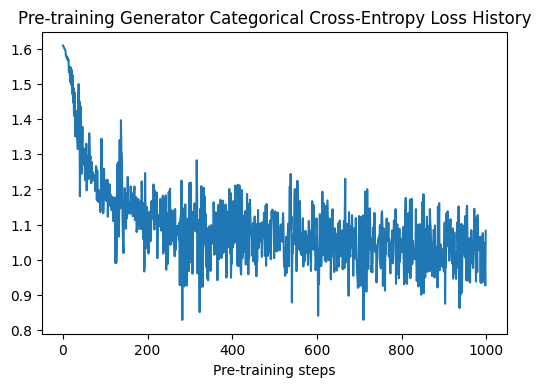

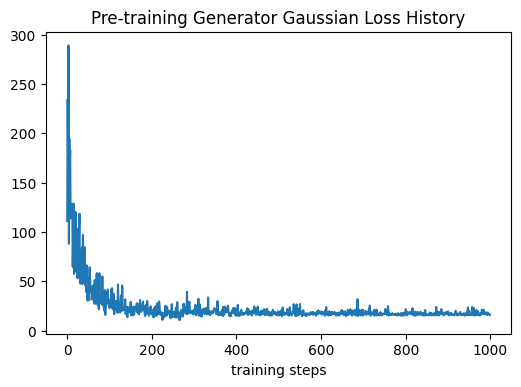

In [71]:
x = range(len(pretrain_gen_ce_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_ce_loss_history)
plt.title('Pre-training Generator Categorical Cross-Entropy Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_gen_gaussian_loss_history)
plt.title('Pre-training Generator Gaussian Loss History')
plt.xlabel('training steps')

### predict using pretrained G on self-regression

In [72]:
self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
print(self_target_token.squeeze())

curr_state_et = self_regression_et
curr_state_ts = self_regression_ts

pred_token_prob, gaussian_log, mask, alpha, mu, sigma = pretrained_generator.predict((curr_state_et, curr_state_ts))
pred_token_prob.shape
print(pred_token_prob.argmax(axis=1))

[2. 3. 3. 4. 2. 3. 2. 4. 3. 4.]
[2 3 3 3 3 3 3 3 3 2]


### Save Pretrained G

In [73]:
if not os.path.exists('./gan_model_weights/'):
    os.makedirs('./gan_model_weights/')
    
G_save_path = './gan_model_weights/pretrained_1000_gen.h5'
pretrained_generator.save_weights(G_save_path)

In [74]:
reload_pretrained_gen = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)

reload_pretrained_gen.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_gen.load_weights(G_save_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [75]:
reload_pretrained_gen.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
event_type (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 11, 1, 5)     25          event_type[0][0]                 
__________________________________________________________________________________________________
time_delta (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
reshape_12 (Reshape)            (None, 11, 5)        0           embedding_12[0][0]               
___________________________________________________________________________________________

## Pretrain D 

In [48]:
pretrain_D_et = np.concatenate([valid_event_type_seqs, invalid_event_type_seqs], axis=0)
pretrain_D_ts = np.concatenate([valid_timestamp_seqs, invalid_timestamp_seqs], axis=0)

pretrain_D_labels = np.concatenate([np.ones((valid_event_type_seqs.shape[0], 1)), 
                                  np.zeros((invalid_event_type_seqs.shape[0], 1))
                                 ], axis=0)
pretrain_D_features = (pretrain_D_et, pretrain_D_ts)
N_pretrain_D = pretrain_D_ts.shape[0]

In [53]:
WEIGHT_GAUSSIAN_LOSS = 1e-2
OPTIMIZER = Adam(lr=1e-3)

EPOCHS = 1
_TOTAL_STEPS = 1000

pretrain_D_dataset = create_dataset(pretrain_D_features,
                                  pretrain_D_labels,
                                  batch_size=BATCH_SIZE,
                                  epochs=1,
                                  buffer_size=N_pretrain_D)

pretrained_discriminator = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [54]:
pretrain_disc_token_loss_history = []
pretrain_disc_gaussian_loss_history = []

step = 0

for features_batch, real_labels in tqdm(pretrain_D_dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)
        
    disc_token_loss, disc_gaussian_loss = pretrain_discriminator(features_batch, real_labels, pretrained_discriminator, verbose=False, 
                                                                 weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS, optimizer=OPTIMIZER)
    pretrain_disc_token_loss_history.append(disc_token_loss.numpy())
    pretrain_disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

1it [00:01,  1.24s/it]

Training Step: 2


2it [00:01,  1.06it/s]

Training Step: 3


3it [00:01,  1.35it/s]

Training Step: 4


4it [00:02,  1.68it/s]

Training Step: 5


5it [00:02,  2.04it/s]

Training Step: 6


6it [00:02,  2.39it/s]

Training Step: 7


7it [00:02,  2.74it/s]

Training Step: 8


8it [00:03,  3.02it/s]

Training Step: 9


9it [00:03,  3.25it/s]

Training Step: 10


10it [00:03,  3.45it/s]

Training Step: 11


11it [00:03,  3.63it/s]

Training Step: 12


12it [00:03,  3.74it/s]

Training Step: 13


13it [00:04,  3.85it/s]

Training Step: 14


14it [00:04,  3.91it/s]

Training Step: 15


15it [00:04,  3.90it/s]

Training Step: 16


16it [00:04,  3.97it/s]

Training Step: 17


17it [00:05,  3.94it/s]

Training Step: 18


18it [00:05,  3.89it/s]

Training Step: 19


19it [00:05,  3.94it/s]

Training Step: 20


20it [00:06,  3.98it/s]

Training Step: 21


21it [00:06,  4.03it/s]

Training Step: 22


22it [00:06,  3.96it/s]

Training Step: 23


23it [00:06,  3.97it/s]

Training Step: 24


24it [00:06,  4.02it/s]

Training Step: 25


25it [00:07,  4.02it/s]

Training Step: 26


26it [00:07,  3.99it/s]

Training Step: 27


27it [00:07,  4.01it/s]

Training Step: 28


28it [00:08,  3.98it/s]

Training Step: 29


29it [00:08,  3.92it/s]

Training Step: 30


30it [00:08,  3.92it/s]

Training Step: 31


31it [00:08,  3.91it/s]

Training Step: 32


32it [00:09,  3.95it/s]

Training Step: 33


33it [00:09,  3.97it/s]

Training Step: 34


34it [00:09,  3.94it/s]

Training Step: 35


35it [00:09,  3.97it/s]

Training Step: 36


36it [00:10,  3.94it/s]

Training Step: 37


37it [00:10,  3.93it/s]

Training Step: 38


38it [00:10,  3.95it/s]

Training Step: 39


39it [00:10,  3.98it/s]

Training Step: 40


40it [00:11,  3.96it/s]

Training Step: 41


41it [00:11,  3.89it/s]

Training Step: 42


42it [00:11,  3.91it/s]

Training Step: 43


43it [00:11,  3.91it/s]

Training Step: 44


44it [00:12,  3.89it/s]

Training Step: 45


45it [00:12,  3.91it/s]

Training Step: 46


46it [00:12,  3.90it/s]

Training Step: 47


47it [00:12,  3.91it/s]

Training Step: 48


48it [00:13,  3.95it/s]

Training Step: 49


49it [00:13,  4.01it/s]

Training Step: 50


50it [00:13,  4.00it/s]

Training Step: 51


51it [00:13,  4.01it/s]

Training Step: 52


52it [00:14,  4.03it/s]

Training Step: 53


53it [00:14,  4.03it/s]

Training Step: 54


54it [00:14,  3.97it/s]

Training Step: 55


55it [00:14,  3.96it/s]

Training Step: 56


56it [00:15,  3.94it/s]

Training Step: 57


57it [00:15,  3.94it/s]

Training Step: 58


58it [00:15,  3.91it/s]

Training Step: 59


59it [00:15,  3.92it/s]

Training Step: 60


60it [00:16,  3.95it/s]

Training Step: 61


61it [00:16,  3.92it/s]

Training Step: 62


62it [00:16,  3.93it/s]

Training Step: 63


63it [00:16,  3.92it/s]

Training Step: 64


64it [00:17,  3.91it/s]

Training Step: 65


65it [00:17,  3.87it/s]

Training Step: 66


66it [00:17,  3.87it/s]

Training Step: 67


67it [00:17,  3.91it/s]

Training Step: 68


68it [00:18,  3.97it/s]

Training Step: 69


69it [00:18,  3.96it/s]

Training Step: 70


70it [00:18,  3.90it/s]

Training Step: 71


71it [00:18,  3.96it/s]

Training Step: 72


72it [00:19,  4.00it/s]

Training Step: 73


73it [00:19,  4.00it/s]

Training Step: 74


74it [00:19,  3.99it/s]

Training Step: 75


75it [00:19,  4.03it/s]

Training Step: 76


76it [00:20,  3.97it/s]

Training Step: 77


77it [00:20,  3.98it/s]

Training Step: 78


78it [00:20,  4.01it/s]

Training Step: 79


79it [00:20,  4.04it/s]

Training Step: 80


80it [00:21,  4.03it/s]

Training Step: 81


81it [00:21,  4.03it/s]

Training Step: 82


82it [00:21,  4.03it/s]

Training Step: 83


83it [00:21,  4.02it/s]

Training Step: 84


84it [00:22,  4.04it/s]

Training Step: 85


85it [00:22,  4.04it/s]

Training Step: 86


86it [00:22,  4.05it/s]

Training Step: 87


87it [00:22,  4.04it/s]

Training Step: 88


88it [00:23,  4.03it/s]

Training Step: 89


89it [00:23,  4.04it/s]

Training Step: 90


90it [00:23,  4.05it/s]

Training Step: 91


91it [00:23,  4.04it/s]

Training Step: 92


92it [00:24,  4.08it/s]

Training Step: 93


93it [00:24,  4.02it/s]

Training Step: 94


94it [00:24,  4.02it/s]

Training Step: 95


95it [00:24,  4.02it/s]

Training Step: 96


96it [00:25,  4.02it/s]

Training Step: 97


97it [00:25,  4.05it/s]

Training Step: 98


98it [00:25,  4.09it/s]

Training Step: 99


99it [00:25,  4.08it/s]

Training Step: 100


100it [00:26,  4.08it/s]

Training Step: 101


101it [00:26,  4.06it/s]

Training Step: 102


102it [00:26,  4.04it/s]

Training Step: 103


103it [00:26,  4.00it/s]

Training Step: 104


104it [00:27,  3.98it/s]

Training Step: 105


105it [00:27,  4.00it/s]

Training Step: 106


106it [00:27,  3.98it/s]

Training Step: 107


107it [00:27,  3.98it/s]

Training Step: 108


108it [00:28,  3.99it/s]

Training Step: 109


109it [00:28,  4.01it/s]

Training Step: 110


110it [00:28,  4.03it/s]

Training Step: 111


111it [00:28,  4.04it/s]

Training Step: 112


112it [00:29,  4.06it/s]

Training Step: 113


113it [00:29,  4.02it/s]

Training Step: 114


114it [00:29,  4.00it/s]

Training Step: 115


115it [00:29,  4.03it/s]

Training Step: 116


116it [00:30,  4.06it/s]

Training Step: 117


117it [00:30,  4.04it/s]

Training Step: 118


118it [00:30,  4.01it/s]

Training Step: 119


119it [00:30,  4.03it/s]

Training Step: 120


120it [00:31,  4.07it/s]

Training Step: 121


121it [00:31,  4.09it/s]

Training Step: 122


122it [00:31,  4.02it/s]

Training Step: 123


123it [00:31,  4.03it/s]

Training Step: 124


124it [00:32,  4.04it/s]

Training Step: 125


125it [00:32,  3.99it/s]

Training Step: 126


126it [00:32,  4.05it/s]

Training Step: 127


127it [00:32,  4.03it/s]

Training Step: 128


128it [00:33,  4.05it/s]

Training Step: 129


129it [00:33,  4.10it/s]

Training Step: 130


130it [00:33,  4.02it/s]

Training Step: 131


131it [00:33,  4.01it/s]

Training Step: 132


132it [00:34,  4.06it/s]

Training Step: 133


133it [00:34,  4.03it/s]

Training Step: 134


134it [00:34,  3.99it/s]

Training Step: 135


135it [00:34,  3.97it/s]

Training Step: 136


136it [00:35,  3.29it/s]

Training Step: 137


137it [00:35,  3.48it/s]

Training Step: 138


138it [00:35,  3.64it/s]

Training Step: 139


139it [00:35,  3.69it/s]

Training Step: 140


140it [00:36,  3.82it/s]

Training Step: 141


141it [00:36,  3.89it/s]

Training Step: 142


142it [00:36,  3.88it/s]

Training Step: 143


143it [00:36,  3.91it/s]

Training Step: 144


144it [00:37,  3.95it/s]

Training Step: 145


145it [00:37,  3.94it/s]

Training Step: 146


146it [00:37,  4.01it/s]

Training Step: 147


147it [00:37,  4.02it/s]

Training Step: 148


148it [00:38,  4.03it/s]

Training Step: 149


149it [00:38,  4.02it/s]

Training Step: 150


150it [00:38,  4.03it/s]

Training Step: 151


151it [00:38,  4.00it/s]

Training Step: 152


152it [00:39,  4.01it/s]

Training Step: 153


153it [00:39,  3.98it/s]

Training Step: 154


154it [00:39,  4.03it/s]

Training Step: 155


155it [00:39,  3.98it/s]

Training Step: 156


156it [00:40,  4.00it/s]

Training Step: 157


157it [00:40,  3.97it/s]

Training Step: 158


158it [00:40,  3.90it/s]

Training Step: 159


159it [00:40,  3.92it/s]

Training Step: 160


160it [00:41,  3.94it/s]

Training Step: 161


161it [00:41,  3.97it/s]

Training Step: 162


162it [00:41,  4.01it/s]

Training Step: 163


163it [00:41,  4.01it/s]

Training Step: 164


164it [00:42,  4.01it/s]

Training Step: 165


165it [00:42,  3.98it/s]

Training Step: 166


166it [00:42,  3.96it/s]

Training Step: 167


167it [00:43,  3.90it/s]

Training Step: 168


168it [00:43,  3.96it/s]

Training Step: 169


169it [00:43,  3.95it/s]

Training Step: 170


170it [00:43,  3.99it/s]

Training Step: 171


171it [00:44,  3.94it/s]

Training Step: 172


172it [00:44,  3.95it/s]

Training Step: 173


173it [00:44,  3.93it/s]

Training Step: 174


174it [00:44,  3.28it/s]

Training Step: 175


175it [00:45,  3.48it/s]

Training Step: 176


176it [00:45,  3.64it/s]

Training Step: 177


177it [00:45,  3.78it/s]

Training Step: 178


178it [00:45,  3.81it/s]

Training Step: 179


179it [00:46,  3.83it/s]

Training Step: 180


180it [00:46,  3.92it/s]

Training Step: 181


181it [00:46,  3.97it/s]

Training Step: 182


182it [00:46,  4.00it/s]

Training Step: 183


183it [00:47,  4.05it/s]

Training Step: 184


184it [00:47,  4.08it/s]

Training Step: 185


185it [00:47,  4.06it/s]

Training Step: 186


186it [00:47,  4.06it/s]

Training Step: 187


187it [00:48,  4.07it/s]

Training Step: 188


188it [00:48,  4.08it/s]

Training Step: 189


189it [00:48,  4.01it/s]

Training Step: 190


190it [00:48,  4.02it/s]

Training Step: 191


191it [00:49,  4.01it/s]

Training Step: 192


192it [00:49,  4.01it/s]

Training Step: 193


193it [00:49,  3.98it/s]

Training Step: 194


194it [00:49,  3.98it/s]

Training Step: 195


195it [00:50,  4.04it/s]

Training Step: 196


196it [00:50,  4.06it/s]

Training Step: 197


197it [00:50,  4.10it/s]

Training Step: 198


198it [00:50,  4.12it/s]

Training Step: 199


199it [00:51,  4.13it/s]

Training Step: 200


200it [00:51,  4.11it/s]

Training Step: 201


201it [00:51,  4.07it/s]

Training Step: 202


202it [00:51,  4.04it/s]

Training Step: 203


203it [00:52,  4.06it/s]

Training Step: 204


204it [00:52,  4.05it/s]

Training Step: 205


205it [00:52,  4.05it/s]

Training Step: 206


206it [00:52,  4.06it/s]

Training Step: 207


207it [00:53,  4.10it/s]

Training Step: 208


208it [00:53,  4.14it/s]

Training Step: 209


209it [00:53,  4.12it/s]

Training Step: 210


210it [00:53,  4.09it/s]

Training Step: 211


211it [00:54,  4.07it/s]

Training Step: 212


212it [00:54,  4.02it/s]

Training Step: 213


213it [00:54,  4.01it/s]

Training Step: 214


214it [00:54,  4.03it/s]

Training Step: 215


215it [00:55,  4.03it/s]

Training Step: 216


216it [00:55,  4.00it/s]

Training Step: 217


217it [00:55,  3.98it/s]

Training Step: 218


218it [00:55,  4.00it/s]

Training Step: 219


219it [00:56,  3.36it/s]

Training Step: 220


220it [00:56,  3.52it/s]

Training Step: 221


221it [00:56,  3.65it/s]

Training Step: 222


222it [00:56,  3.79it/s]

Training Step: 223


223it [00:57,  3.89it/s]

Training Step: 224


224it [00:57,  3.91it/s]

Training Step: 225


225it [00:57,  3.93it/s]

Training Step: 226


226it [00:57,  4.00it/s]

Training Step: 227


227it [00:58,  4.06it/s]

Training Step: 228


228it [00:58,  4.09it/s]

Training Step: 229


229it [00:58,  4.06it/s]

Training Step: 230


230it [00:58,  4.05it/s]

Training Step: 231


231it [00:59,  4.00it/s]

Training Step: 232


232it [00:59,  3.99it/s]

Training Step: 233


233it [00:59,  3.99it/s]

Training Step: 234


234it [00:59,  4.02it/s]

Training Step: 235


235it [01:00,  4.00it/s]

Training Step: 236


236it [01:00,  3.98it/s]

Training Step: 237


237it [01:00,  3.99it/s]

Training Step: 238


238it [01:00,  3.99it/s]

Training Step: 239


239it [01:01,  4.00it/s]

Training Step: 240


240it [01:01,  4.00it/s]

Training Step: 241


241it [01:01,  4.01it/s]

Training Step: 242


242it [01:01,  4.07it/s]

Training Step: 243


243it [01:02,  4.03it/s]

Training Step: 244


244it [01:02,  4.05it/s]

Training Step: 245


245it [01:02,  4.07it/s]

Training Step: 246


246it [01:02,  4.01it/s]

Training Step: 247


247it [01:03,  3.99it/s]

Training Step: 248


248it [01:03,  4.00it/s]

Training Step: 249


249it [01:03,  3.95it/s]

Training Step: 250


250it [01:03,  3.97it/s]

Training Step: 251


251it [01:04,  3.98it/s]

Training Step: 252


252it [01:04,  3.91it/s]

Training Step: 253


253it [01:04,  3.93it/s]

Training Step: 254


254it [01:04,  3.97it/s]

Training Step: 255


255it [01:05,  4.05it/s]

Training Step: 256


256it [01:05,  4.03it/s]

Training Step: 257


257it [01:05,  4.04it/s]

Training Step: 258


258it [01:05,  4.03it/s]

Training Step: 259


259it [01:06,  4.03it/s]

Training Step: 260


260it [01:06,  3.38it/s]

Training Step: 261


261it [01:06,  3.57it/s]

Training Step: 262


262it [01:07,  3.71it/s]

Training Step: 263


263it [01:07,  3.83it/s]

Training Step: 264


264it [01:07,  3.91it/s]

Training Step: 265


265it [01:07,  3.99it/s]

Training Step: 266


266it [01:08,  4.07it/s]

Training Step: 267


267it [01:08,  4.05it/s]

Training Step: 268


268it [01:08,  4.02it/s]

Training Step: 269


269it [01:08,  4.04it/s]

Training Step: 270


270it [01:09,  4.00it/s]

Training Step: 271


271it [01:09,  4.01it/s]

Training Step: 272


272it [01:09,  3.99it/s]

Training Step: 273


273it [01:09,  4.00it/s]

Training Step: 274


274it [01:10,  4.02it/s]

Training Step: 275


275it [01:10,  4.05it/s]

Training Step: 276


276it [01:10,  4.03it/s]

Training Step: 277


277it [01:10,  4.07it/s]

Training Step: 278


278it [01:11,  4.07it/s]

Training Step: 279


279it [01:11,  4.02it/s]

Training Step: 280


280it [01:11,  4.03it/s]

Training Step: 281


281it [01:11,  4.01it/s]

Training Step: 282


282it [01:12,  4.01it/s]

Training Step: 283


283it [01:12,  3.99it/s]

Training Step: 284


284it [01:12,  3.99it/s]

Training Step: 285


285it [01:12,  4.02it/s]

Training Step: 286


286it [01:13,  4.03it/s]

Training Step: 287


287it [01:13,  4.02it/s]

Training Step: 288


288it [01:13,  4.01it/s]

Training Step: 289


289it [01:13,  4.03it/s]

Training Step: 290


290it [01:13,  4.05it/s]

Training Step: 291


291it [01:14,  4.07it/s]

Training Step: 292


292it [01:14,  4.08it/s]

Training Step: 293


293it [01:14,  4.10it/s]

Training Step: 294


294it [01:14,  4.09it/s]

Training Step: 295


295it [01:15,  4.06it/s]

Training Step: 296


296it [01:15,  4.10it/s]

Training Step: 297


297it [01:15,  4.08it/s]

Training Step: 298


298it [01:15,  4.10it/s]

Training Step: 299


299it [01:16,  4.10it/s]

Training Step: 300


300it [01:16,  4.08it/s]

Training Step: 301


301it [01:16,  4.09it/s]

Training Step: 302


302it [01:16,  4.04it/s]

Training Step: 303


303it [01:17,  4.02it/s]

Training Step: 304


304it [01:17,  3.97it/s]

Training Step: 305


305it [01:17,  3.31it/s]

Training Step: 306


306it [01:18,  3.50it/s]

Training Step: 307


307it [01:18,  3.64it/s]

Training Step: 308


308it [01:18,  3.74it/s]

Training Step: 309


309it [01:18,  3.81it/s]

Training Step: 310


310it [01:19,  3.87it/s]

Training Step: 311


311it [01:19,  3.92it/s]

Training Step: 312


312it [01:19,  3.96it/s]

Training Step: 313


313it [01:19,  3.97it/s]

Training Step: 314


314it [01:20,  4.03it/s]

Training Step: 315


315it [01:20,  4.02it/s]

Training Step: 316


316it [01:20,  4.06it/s]

Training Step: 317


317it [01:20,  4.06it/s]

Training Step: 318


318it [01:21,  4.06it/s]

Training Step: 319


319it [01:21,  4.06it/s]

Training Step: 320


320it [01:21,  4.07it/s]

Training Step: 321


321it [01:21,  4.07it/s]

Training Step: 322


322it [01:22,  4.10it/s]

Training Step: 323


323it [01:22,  4.09it/s]

Training Step: 324


324it [01:22,  4.04it/s]

Training Step: 325


325it [01:22,  4.02it/s]

Training Step: 326


326it [01:23,  4.00it/s]

Training Step: 327


327it [01:23,  3.99it/s]

Training Step: 328


328it [01:23,  4.00it/s]

Training Step: 329


329it [01:23,  4.03it/s]

Training Step: 330


330it [01:24,  4.05it/s]

Training Step: 331


331it [01:24,  3.98it/s]

Training Step: 332


332it [01:24,  4.02it/s]

Training Step: 333


333it [01:24,  4.00it/s]

Training Step: 334


334it [01:25,  4.04it/s]

Training Step: 335


335it [01:25,  4.07it/s]

Training Step: 336


336it [01:25,  3.98it/s]

Training Step: 337


337it [01:25,  3.95it/s]

Training Step: 338


338it [01:26,  3.94it/s]

Training Step: 339


339it [01:26,  3.87it/s]

Training Step: 340


340it [01:26,  3.87it/s]

Training Step: 341


341it [01:26,  3.83it/s]

Training Step: 342


342it [01:27,  3.82it/s]

Training Step: 343


343it [01:27,  3.80it/s]

Training Step: 344


344it [01:27,  3.81it/s]

Training Step: 345


345it [01:27,  3.83it/s]

Training Step: 346


346it [01:28,  3.19it/s]

Training Step: 347


347it [01:28,  3.40it/s]

Training Step: 348


348it [01:28,  3.56it/s]

Training Step: 349


349it [01:29,  3.63it/s]

Training Step: 350


350it [01:29,  3.74it/s]

Training Step: 351


351it [01:29,  3.80it/s]

Training Step: 352


352it [01:29,  3.87it/s]

Training Step: 353


353it [01:30,  3.87it/s]

Training Step: 354


354it [01:30,  3.93it/s]

Training Step: 355


355it [01:30,  3.98it/s]

Training Step: 356


356it [01:30,  3.96it/s]

Training Step: 357


357it [01:31,  3.99it/s]

Training Step: 358


358it [01:31,  4.01it/s]

Training Step: 359


359it [01:31,  3.95it/s]

Training Step: 360


360it [01:31,  3.96it/s]

Training Step: 361


361it [01:32,  3.93it/s]

Training Step: 362


362it [01:32,  3.90it/s]

Training Step: 363


363it [01:32,  3.88it/s]

Training Step: 364


364it [01:32,  3.87it/s]

Training Step: 365


365it [01:33,  3.92it/s]

Training Step: 366


366it [01:33,  3.90it/s]

Training Step: 367


367it [01:33,  3.95it/s]

Training Step: 368


368it [01:33,  3.92it/s]

Training Step: 369


369it [01:34,  3.94it/s]

Training Step: 370


370it [01:34,  3.94it/s]

Training Step: 371


371it [01:34,  3.89it/s]

Training Step: 372


372it [01:34,  3.89it/s]

Training Step: 373


373it [01:35,  3.95it/s]

Training Step: 374


374it [01:35,  3.93it/s]

Training Step: 375


375it [01:35,  3.88it/s]

Training Step: 376


376it [01:35,  3.91it/s]

Training Step: 377


377it [01:36,  3.92it/s]

Training Step: 378


378it [01:36,  3.90it/s]

Training Step: 379


379it [01:36,  3.93it/s]

Training Step: 380


380it [01:36,  3.92it/s]

Training Step: 381


381it [01:37,  3.92it/s]

Training Step: 382


382it [01:37,  3.93it/s]

Training Step: 383


383it [01:37,  3.95it/s]

Training Step: 384


384it [01:37,  3.96it/s]

Training Step: 385


385it [01:38,  4.01it/s]

Training Step: 386


386it [01:38,  4.00it/s]

Training Step: 387


387it [01:38,  4.00it/s]

Training Step: 388


388it [01:38,  4.01it/s]

Training Step: 389


389it [01:39,  3.99it/s]

Training Step: 390


390it [01:39,  3.98it/s]

Training Step: 391


391it [01:39,  3.32it/s]

Training Step: 392


392it [01:40,  3.49it/s]

Training Step: 393


393it [01:40,  3.62it/s]

Training Step: 394


394it [01:40,  3.73it/s]

Training Step: 395


395it [01:40,  3.75it/s]

Training Step: 396


396it [01:41,  3.80it/s]

Training Step: 397


397it [01:41,  3.84it/s]

Training Step: 398


398it [01:41,  3.89it/s]

Training Step: 399


399it [01:41,  3.93it/s]

Training Step: 400


400it [01:42,  3.93it/s]

Training Step: 401


401it [01:42,  3.91it/s]

Training Step: 402


402it [01:42,  3.95it/s]

Training Step: 403


403it [01:42,  3.93it/s]

Training Step: 404


404it [01:43,  3.90it/s]

Training Step: 405


405it [01:43,  3.90it/s]

Training Step: 406


406it [01:43,  3.92it/s]

Training Step: 407


407it [01:43,  3.92it/s]

Training Step: 408


408it [01:44,  3.93it/s]

Training Step: 409


409it [01:44,  3.99it/s]

Training Step: 410


410it [01:44,  3.98it/s]

Training Step: 411


411it [01:44,  3.99it/s]

Training Step: 412


412it [01:45,  4.03it/s]

Training Step: 413


413it [01:45,  4.00it/s]

Training Step: 414


414it [01:45,  4.05it/s]

Training Step: 415


415it [01:45,  4.01it/s]

Training Step: 416


416it [01:46,  4.01it/s]

Training Step: 417


417it [01:46,  3.98it/s]

Training Step: 418


418it [01:46,  3.97it/s]

Training Step: 419


419it [01:46,  3.98it/s]

Training Step: 420


420it [01:47,  4.01it/s]

Training Step: 421


421it [01:47,  3.94it/s]

Training Step: 422


422it [01:47,  4.01it/s]

Training Step: 423


423it [01:47,  4.01it/s]

Training Step: 424


424it [01:48,  3.97it/s]

Training Step: 425


425it [01:48,  3.93it/s]

Training Step: 426


426it [01:48,  4.00it/s]

Training Step: 427


427it [01:48,  4.03it/s]

Training Step: 428


428it [01:49,  4.02it/s]

Training Step: 429


429it [01:49,  3.98it/s]

Training Step: 430


430it [01:49,  3.98it/s]

Training Step: 431


431it [01:49,  3.97it/s]

Training Step: 432


432it [01:50,  3.29it/s]

Training Step: 433


433it [01:50,  3.49it/s]

Training Step: 434


434it [01:50,  3.65it/s]

Training Step: 435


435it [01:51,  3.73it/s]

Training Step: 436


436it [01:51,  3.81it/s]

Training Step: 437


437it [01:51,  3.90it/s]

Training Step: 438


438it [01:51,  3.93it/s]

Training Step: 439


439it [01:52,  3.91it/s]

Training Step: 440


440it [01:52,  3.90it/s]

Training Step: 441


441it [01:52,  3.90it/s]

Training Step: 442


442it [01:52,  3.83it/s]

Training Step: 443


443it [01:53,  3.81it/s]

Training Step: 444


444it [01:53,  3.80it/s]

Training Step: 445


445it [01:53,  3.76it/s]

Training Step: 446


446it [01:54,  3.73it/s]

Training Step: 447


447it [01:54,  3.75it/s]

Training Step: 448


448it [01:54,  3.71it/s]

Training Step: 449


449it [01:54,  3.63it/s]

Training Step: 450


450it [01:55,  3.65it/s]

Training Step: 451


451it [01:55,  3.67it/s]

Training Step: 452


452it [01:55,  3.65it/s]

Training Step: 453


453it [01:55,  3.59it/s]

Training Step: 454


454it [01:56,  3.55it/s]

Training Step: 455


455it [01:56,  3.52it/s]

Training Step: 456


456it [01:56,  3.52it/s]

Training Step: 457


457it [01:57,  3.45it/s]

Training Step: 458


458it [01:57,  3.39it/s]

Training Step: 459


459it [01:57,  3.34it/s]

Training Step: 460


460it [01:58,  3.36it/s]

Training Step: 461


461it [01:58,  3.38it/s]

Training Step: 462


462it [01:58,  3.38it/s]

Training Step: 463


463it [01:58,  3.44it/s]

Training Step: 464


464it [01:59,  3.41it/s]

Training Step: 465


465it [01:59,  3.39it/s]

Training Step: 466


466it [01:59,  3.40it/s]

Training Step: 467


467it [02:00,  3.38it/s]

Training Step: 468


468it [02:00,  3.39it/s]

Training Step: 469


469it [02:00,  3.47it/s]

Training Step: 470


470it [02:00,  3.52it/s]

Training Step: 471


471it [02:01,  3.62it/s]

Training Step: 472


472it [02:01,  3.61it/s]

Training Step: 473


473it [02:01,  3.56it/s]

Training Step: 474


474it [02:02,  3.56it/s]

Training Step: 475


475it [02:02,  3.56it/s]

Training Step: 476


476it [02:02,  3.61it/s]

Training Step: 477


477it [02:03,  3.09it/s]

Training Step: 478


478it [02:03,  3.29it/s]

Training Step: 479


479it [02:03,  3.43it/s]

Training Step: 480


480it [02:03,  3.57it/s]

Training Step: 481


481it [02:04,  3.68it/s]

Training Step: 482


482it [02:04,  3.70it/s]

Training Step: 483


483it [02:04,  3.78it/s]

Training Step: 484


484it [02:04,  3.84it/s]

Training Step: 485


485it [02:05,  3.88it/s]

Training Step: 486


486it [02:05,  3.94it/s]

Training Step: 487


487it [02:05,  3.92it/s]

Training Step: 488


488it [02:05,  3.92it/s]

Training Step: 489


489it [02:06,  3.96it/s]

Training Step: 490


490it [02:06,  3.93it/s]

Training Step: 491


491it [02:06,  3.93it/s]

Training Step: 492


492it [02:06,  3.91it/s]

Training Step: 493


493it [02:07,  3.89it/s]

Training Step: 494


494it [02:07,  3.90it/s]

Training Step: 495


495it [02:07,  3.96it/s]

Training Step: 496


496it [02:07,  4.02it/s]

Training Step: 497


497it [02:08,  4.01it/s]

Training Step: 498


498it [02:08,  3.98it/s]

Training Step: 499


499it [02:08,  3.87it/s]

Training Step: 500


500it [02:08,  3.87it/s]

Training Step: 501


501it [02:09,  3.83it/s]

Training Step: 502


502it [02:09,  3.80it/s]

Training Step: 503


503it [02:09,  3.80it/s]

Training Step: 504


504it [02:09,  3.83it/s]

Training Step: 505


505it [02:10,  3.78it/s]

Training Step: 506


506it [02:10,  3.78it/s]

Training Step: 507


507it [02:10,  3.78it/s]

Training Step: 508


508it [02:10,  3.77it/s]

Training Step: 509


509it [02:11,  3.77it/s]

Training Step: 510


510it [02:11,  3.78it/s]

Training Step: 511


511it [02:11,  3.79it/s]

Training Step: 512


512it [02:12,  3.77it/s]

Training Step: 513


513it [02:12,  3.78it/s]

Training Step: 514


514it [02:12,  3.77it/s]

Training Step: 515


515it [02:12,  3.78it/s]

Training Step: 516


516it [02:13,  3.77it/s]

Training Step: 517


517it [02:13,  3.83it/s]

Training Step: 518


518it [02:13,  3.18it/s]

Training Step: 519


519it [02:14,  3.38it/s]

Training Step: 520


520it [02:14,  3.56it/s]

Training Step: 521


521it [02:14,  3.64it/s]

Training Step: 522


522it [02:14,  3.68it/s]

Training Step: 523


523it [02:15,  3.73it/s]

Training Step: 524


524it [02:15,  3.81it/s]

Training Step: 525


525it [02:15,  3.85it/s]

Training Step: 526


526it [02:15,  3.87it/s]

Training Step: 527


527it [02:16,  3.90it/s]

Training Step: 528


528it [02:16,  3.91it/s]

Training Step: 529


529it [02:16,  3.85it/s]

Training Step: 530


530it [02:16,  3.87it/s]

Training Step: 531


531it [02:17,  3.88it/s]

Training Step: 532


532it [02:17,  3.89it/s]

Training Step: 533


533it [02:17,  3.85it/s]

Training Step: 534


534it [02:17,  3.77it/s]

Training Step: 535


535it [02:18,  3.77it/s]

Training Step: 536


536it [02:18,  3.74it/s]

Training Step: 537


537it [02:18,  3.80it/s]

Training Step: 538


538it [02:18,  3.83it/s]

Training Step: 539


539it [02:19,  3.84it/s]

Training Step: 540


540it [02:19,  3.78it/s]

Training Step: 541


541it [02:19,  3.80it/s]

Training Step: 542


542it [02:20,  3.84it/s]

Training Step: 543


543it [02:20,  3.74it/s]

Training Step: 544


544it [02:20,  3.70it/s]

Training Step: 545


545it [02:20,  3.73it/s]

Training Step: 546


546it [02:21,  3.76it/s]

Training Step: 547


547it [02:21,  3.79it/s]

Training Step: 548


548it [02:21,  3.83it/s]

Training Step: 549


549it [02:21,  3.82it/s]

Training Step: 550


550it [02:22,  3.84it/s]

Training Step: 551


551it [02:22,  3.84it/s]

Training Step: 552


552it [02:22,  3.87it/s]

Training Step: 553


553it [02:22,  3.88it/s]

Training Step: 554


554it [02:23,  3.90it/s]

Training Step: 555


555it [02:23,  3.92it/s]

Training Step: 556


556it [02:23,  3.87it/s]

Training Step: 557


557it [02:23,  3.88it/s]

Training Step: 558


558it [02:24,  3.88it/s]

Training Step: 559


559it [02:24,  3.88it/s]

Training Step: 560


560it [02:24,  3.83it/s]

Training Step: 561


561it [02:24,  3.88it/s]

Training Step: 562


562it [02:25,  3.89it/s]

Training Step: 563


563it [02:25,  3.24it/s]

Training Step: 564


564it [02:25,  3.43it/s]

Training Step: 565


565it [02:26,  3.57it/s]

Training Step: 566


566it [02:26,  3.68it/s]

Training Step: 567


567it [02:26,  3.72it/s]

Training Step: 568


568it [02:26,  3.73it/s]

Training Step: 569


569it [02:27,  3.77it/s]

Training Step: 570


570it [02:27,  3.80it/s]

Training Step: 571


571it [02:27,  3.81it/s]

Training Step: 572


572it [02:27,  3.83it/s]

Training Step: 573


573it [02:28,  3.81it/s]

Training Step: 574


574it [02:28,  3.85it/s]

Training Step: 575


575it [02:28,  3.90it/s]

Training Step: 576


576it [02:29,  3.87it/s]

Training Step: 577


577it [02:29,  3.85it/s]

Training Step: 578


578it [02:29,  3.81it/s]

Training Step: 579


579it [02:29,  3.82it/s]

Training Step: 580


580it [02:30,  3.84it/s]

Training Step: 581


581it [02:30,  3.85it/s]

Training Step: 582


582it [02:30,  3.85it/s]

Training Step: 583


583it [02:30,  3.87it/s]

Training Step: 584


584it [02:31,  3.89it/s]

Training Step: 585


585it [02:31,  3.87it/s]

Training Step: 586


586it [02:31,  3.83it/s]

Training Step: 587


587it [02:31,  3.83it/s]

Training Step: 588


588it [02:32,  3.86it/s]

Training Step: 589


589it [02:32,  3.81it/s]

Training Step: 590


590it [02:32,  3.82it/s]

Training Step: 591


591it [02:32,  3.81it/s]

Training Step: 592


592it [02:33,  3.81it/s]

Training Step: 593


593it [02:33,  3.75it/s]

Training Step: 594


594it [02:33,  3.75it/s]

Training Step: 595


595it [02:34,  3.74it/s]

Training Step: 596


596it [02:34,  3.72it/s]

Training Step: 597


597it [02:34,  3.77it/s]

Training Step: 598


598it [02:34,  3.76it/s]

Training Step: 599


599it [02:35,  3.76it/s]

Training Step: 600


600it [02:35,  3.77it/s]

Training Step: 601


601it [02:35,  3.78it/s]

Training Step: 602


602it [02:35,  3.81it/s]

Training Step: 603


603it [02:36,  3.81it/s]

Training Step: 604


604it [02:36,  3.23it/s]

Training Step: 605


605it [02:36,  3.38it/s]

Training Step: 606


606it [02:37,  3.52it/s]

Training Step: 607


607it [02:37,  3.59it/s]

Training Step: 608


608it [02:37,  3.64it/s]

Training Step: 609


609it [02:37,  3.70it/s]

Training Step: 610


610it [02:38,  3.73it/s]

Training Step: 611


611it [02:38,  3.79it/s]

Training Step: 612


612it [02:38,  3.80it/s]

Training Step: 613


613it [02:38,  3.83it/s]

Training Step: 614


614it [02:39,  3.82it/s]

Training Step: 615


615it [02:39,  3.83it/s]

Training Step: 616


616it [02:39,  3.82it/s]

Training Step: 617


617it [02:39,  3.80it/s]

Training Step: 618


618it [02:40,  3.77it/s]

Training Step: 619


619it [02:40,  3.77it/s]

Training Step: 620


620it [02:40,  3.78it/s]

Training Step: 621


621it [02:40,  3.79it/s]

Training Step: 622


622it [02:41,  3.80it/s]

Training Step: 623


623it [02:41,  3.81it/s]

Training Step: 624


624it [02:41,  3.77it/s]

Training Step: 625


625it [02:42,  3.78it/s]

Training Step: 626


626it [02:42,  3.76it/s]

Training Step: 627


627it [02:42,  3.72it/s]

Training Step: 628


628it [02:42,  3.76it/s]

Training Step: 629


629it [02:43,  3.82it/s]

Training Step: 630


630it [02:43,  3.84it/s]

Training Step: 631


631it [02:43,  3.87it/s]

Training Step: 632


632it [02:43,  3.84it/s]

Training Step: 633


633it [02:44,  3.84it/s]

Training Step: 634


634it [02:44,  3.84it/s]

Training Step: 635


635it [02:44,  3.83it/s]

Training Step: 636


636it [02:44,  3.77it/s]

Training Step: 637


637it [02:45,  3.81it/s]

Training Step: 638


638it [02:45,  3.77it/s]

Training Step: 639


639it [02:45,  3.69it/s]

Training Step: 640


640it [02:46,  3.70it/s]

Training Step: 641


641it [02:46,  3.70it/s]

Training Step: 642


642it [02:46,  3.72it/s]

Training Step: 643


643it [02:46,  3.74it/s]

Training Step: 644


644it [02:47,  3.76it/s]

Training Step: 645


645it [02:47,  3.78it/s]

Training Step: 646


646it [02:47,  3.78it/s]

Training Step: 647


647it [02:47,  3.82it/s]

Training Step: 648


648it [02:48,  3.84it/s]

Training Step: 649


649it [02:48,  3.15it/s]

Training Step: 650


650it [02:48,  3.33it/s]

Training Step: 651


651it [02:49,  3.43it/s]

Training Step: 652


652it [02:49,  3.54it/s]

Training Step: 653


653it [02:49,  3.55it/s]

Training Step: 654


654it [02:49,  3.62it/s]

Training Step: 655


655it [02:50,  3.66it/s]

Training Step: 656


656it [02:50,  3.64it/s]

Training Step: 657


657it [02:50,  3.63it/s]

Training Step: 658


658it [02:50,  3.65it/s]

Training Step: 659


659it [02:51,  3.64it/s]

Training Step: 660


660it [02:51,  3.69it/s]

Training Step: 661


661it [02:51,  3.76it/s]

Training Step: 662


662it [02:52,  3.79it/s]

Training Step: 663


663it [02:52,  3.76it/s]

Training Step: 664


664it [02:52,  3.79it/s]

Training Step: 665


665it [02:52,  3.84it/s]

Training Step: 666


666it [02:53,  3.89it/s]

Training Step: 667


667it [02:53,  3.86it/s]

Training Step: 668


668it [02:53,  3.91it/s]

Training Step: 669


669it [02:53,  3.87it/s]

Training Step: 670


670it [02:54,  3.82it/s]

Training Step: 671


671it [02:54,  3.76it/s]

Training Step: 672


672it [02:54,  3.69it/s]

Training Step: 673


673it [02:54,  3.70it/s]

Training Step: 674


674it [02:55,  3.73it/s]

Training Step: 675


675it [02:55,  3.78it/s]

Training Step: 676


676it [02:55,  3.77it/s]

Training Step: 677


677it [02:55,  3.80it/s]

Training Step: 678


678it [02:56,  3.86it/s]

Training Step: 679


679it [02:56,  3.88it/s]

Training Step: 680


680it [02:56,  3.84it/s]

Training Step: 681


681it [02:57,  3.81it/s]

Training Step: 682


682it [02:57,  3.76it/s]

Training Step: 683


683it [02:57,  3.75it/s]

Training Step: 684


684it [02:57,  3.74it/s]

Training Step: 685


685it [02:58,  3.73it/s]

Training Step: 686


686it [02:58,  3.72it/s]

Training Step: 687


687it [02:58,  3.71it/s]

Training Step: 688


688it [02:58,  3.78it/s]

Training Step: 689


689it [02:59,  3.78it/s]

Training Step: 690


690it [02:59,  3.20it/s]

Training Step: 691


691it [02:59,  3.38it/s]

Training Step: 692


692it [03:00,  3.48it/s]

Training Step: 693


693it [03:00,  3.56it/s]

Training Step: 694


694it [03:00,  3.63it/s]

Training Step: 695


695it [03:00,  3.67it/s]

Training Step: 696


696it [03:01,  3.68it/s]

Training Step: 697


697it [03:01,  3.69it/s]

Training Step: 698


698it [03:01,  3.72it/s]

Training Step: 699


699it [03:01,  3.74it/s]

Training Step: 700


700it [03:02,  3.76it/s]

Training Step: 701


701it [03:02,  3.78it/s]

Training Step: 702


702it [03:02,  3.77it/s]

Training Step: 703


703it [03:03,  3.78it/s]

Training Step: 704


704it [03:03,  3.76it/s]

Training Step: 705


705it [03:03,  3.76it/s]

Training Step: 706


706it [03:03,  3.79it/s]

Training Step: 707


707it [03:04,  3.83it/s]

Training Step: 708


708it [03:04,  3.84it/s]

Training Step: 709


709it [03:04,  3.83it/s]

Training Step: 710


710it [03:04,  3.90it/s]

Training Step: 711


711it [03:05,  3.93it/s]

Training Step: 712


712it [03:05,  3.93it/s]

Training Step: 713


713it [03:05,  3.97it/s]

Training Step: 714


714it [03:05,  3.92it/s]

Training Step: 715


715it [03:06,  3.84it/s]

Training Step: 716


716it [03:06,  3.85it/s]

Training Step: 717


717it [03:06,  3.82it/s]

Training Step: 718


718it [03:06,  3.78it/s]

Training Step: 719


719it [03:07,  3.75it/s]

Training Step: 720


720it [03:07,  3.72it/s]

Training Step: 721


721it [03:07,  3.73it/s]

Training Step: 722


722it [03:08,  3.74it/s]

Training Step: 723


723it [03:08,  3.74it/s]

Training Step: 724


724it [03:08,  3.74it/s]

Training Step: 725


725it [03:08,  3.78it/s]

Training Step: 726


726it [03:09,  3.77it/s]

Training Step: 727


727it [03:09,  3.74it/s]

Training Step: 728


728it [03:09,  3.80it/s]

Training Step: 729


729it [03:09,  3.76it/s]

Training Step: 730


730it [03:10,  3.75it/s]

Training Step: 731


731it [03:10,  3.71it/s]

Training Step: 732


732it [03:10,  3.71it/s]

Training Step: 733


733it [03:10,  3.73it/s]

Training Step: 734


734it [03:11,  3.74it/s]

Training Step: 735


735it [03:11,  3.10it/s]

Training Step: 736


736it [03:11,  3.25it/s]

Training Step: 737


737it [03:12,  3.37it/s]

Training Step: 738


738it [03:12,  3.48it/s]

Training Step: 739


739it [03:12,  3.54it/s]

Training Step: 740


740it [03:13,  3.62it/s]

Training Step: 741


741it [03:13,  3.66it/s]

Training Step: 742


742it [03:13,  3.74it/s]

Training Step: 743


743it [03:13,  3.75it/s]

Training Step: 744


744it [03:14,  3.78it/s]

Training Step: 745


745it [03:14,  3.78it/s]

Training Step: 746


746it [03:14,  3.83it/s]

Training Step: 747


747it [03:14,  3.85it/s]

Training Step: 748


748it [03:15,  3.86it/s]

Training Step: 749


749it [03:15,  3.82it/s]

Training Step: 750


750it [03:15,  3.79it/s]

Training Step: 751


751it [03:15,  3.77it/s]

Training Step: 752


752it [03:16,  3.83it/s]

Training Step: 753


753it [03:16,  3.79it/s]

Training Step: 754


754it [03:16,  3.80it/s]

Training Step: 755


755it [03:16,  3.79it/s]

Training Step: 756


756it [03:17,  3.78it/s]

Training Step: 757


757it [03:17,  3.80it/s]

Training Step: 758


758it [03:17,  3.83it/s]

Training Step: 759


759it [03:18,  3.78it/s]

Training Step: 760


760it [03:18,  3.75it/s]

Training Step: 761


761it [03:18,  3.72it/s]

Training Step: 762


762it [03:18,  3.72it/s]

Training Step: 763


763it [03:19,  3.72it/s]

Training Step: 764


764it [03:19,  3.76it/s]

Training Step: 765


765it [03:19,  3.79it/s]

Training Step: 766


766it [03:19,  3.75it/s]

Training Step: 767


767it [03:20,  3.79it/s]

Training Step: 768


768it [03:20,  3.80it/s]

Training Step: 769


769it [03:20,  3.79it/s]

Training Step: 770


770it [03:20,  3.80it/s]

Training Step: 771


771it [03:21,  3.79it/s]

Training Step: 772


772it [03:21,  3.79it/s]

Training Step: 773


773it [03:21,  3.82it/s]

Training Step: 774


774it [03:21,  3.78it/s]

Training Step: 775


775it [03:22,  3.82it/s]

Training Step: 776


776it [03:22,  3.14it/s]

Training Step: 777


777it [03:22,  3.26it/s]

Training Step: 778


778it [03:23,  3.40it/s]

Training Step: 779


779it [03:23,  3.47it/s]

Training Step: 780


780it [03:23,  3.52it/s]

Training Step: 781


781it [03:24,  3.50it/s]

Training Step: 782


782it [03:24,  3.83it/s]


Text(0.5, 0, 'training steps')

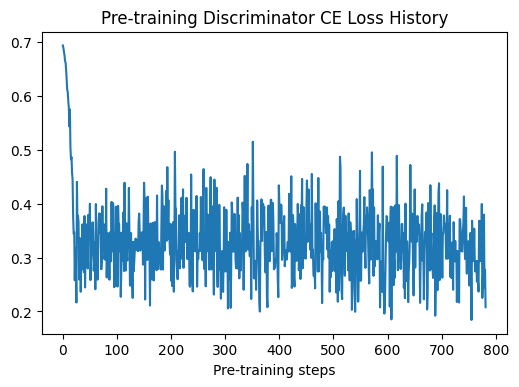

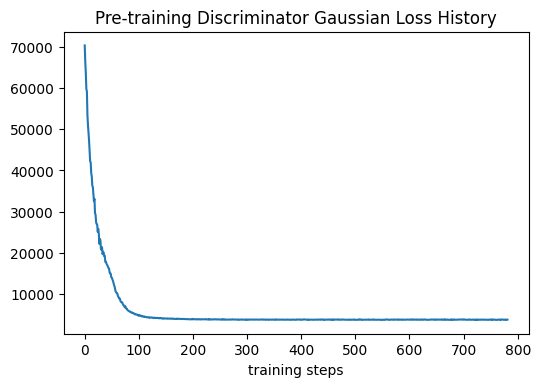

In [56]:
x = range(len(pretrain_disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_token_loss_history)
plt.title('Pre-training Discriminator CE Loss History')
plt.xlabel('Pre-training steps')

x = range(len(pretrain_disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, pretrain_disc_gaussian_loss_history)
plt.title('Pre-training Discriminator Gaussian Loss History')
plt.xlabel('training steps')

### Save Pretrained D

In [63]:
if not os.path.exists('./gan_model_weights/'):
    os.makedirs('./gan_model_weights/')
    
D_save_path = './gan_model_weights/pretrained_1000_disc.h5'
pretrained_discriminator.save_weights(D_save_path)

In [58]:
reload_pretrained_disc = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)

reload_pretrained_disc.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))
reload_pretrained_disc.load_weights(D_save_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [65]:
reload_pretrained_disc.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
event_type (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 11, 1, 5)     25          event_type[0][0]                 
__________________________________________________________________________________________________
time_delta (InputLayer)         [(None, 11, 1)]      0                                            
__________________________________________________________________________________________________
reshape_10 (Reshape)            (None, 11, 5)        0           embedding_10[0][0]               
___________________________________________________________________________________________

## Code chunk

In [4]:
import pickle
import numpy as np
import tensorflow as tf

def load_fixed_length_sequence_from_pickle(pickle_file_path, to_timedelta=True, end_token=0):
    """
        A list of sequence in format of (event_type, timestamp)
        [[(1, 11), (1, 24), (2, 37), (3, 47), (2, 63), (2, 80), (1, 88), (2, 95), (2, 104), (3, 111)], ...]
    :param pickle_file_path: e.g. /.../project-basileus/seq-gan/data/fixed_length/valid_sequences.pickle
    :param to_timedelta: if True, convert absolute time to timedelta
    :param end_token: same as padding token. default 0
    :return: (event_type_seqs, timestamp_seqs)
    """
    with open(pickle_file_path, 'rb') as f:
        raw_seqs = pickle.load(f)

    if not raw_seqs or not raw_seqs[0]:
        return np.array([]), np.array([])

    N = len(raw_seqs)
    T = len(raw_seqs[0])

    event_type_seqs = []
    timestamp_seqs = []

    for seq in raw_seqs:
        _ets, _tss = [], []
        ts_prev = 0
        for et, ts in seq:
            if et == end_token:
                raise ValueError('Actual data should NOT contain END_TOKEN', end_token)
            _ets.append(et)  # 0 is for padding, standing for END_TOKEN or 'N/A'
            if to_timedelta:
                _tss.append(ts - ts_prev)
                ts_prev = ts
            else:
                _tss.append(ts)
        event_type_seqs.append(_ets)
        timestamp_seqs.append(_tss)

    event_type_seqs = np.array(event_type_seqs).astype(np.float64).reshape((N, T, 1))
    timestamp_seqs = np.array(timestamp_seqs).astype(np.float64).reshape((N, T, 1))

    return event_type_seqs, timestamp_seqs

In [5]:
def create_self_regression_data_batch(original_feature_sample, END_TOKEN=0):
    """
        Create self regression dataset given original sequences
        only support batch_size = 1 for now, aka, we have to pretrain the generator one seq by

        e.g. original event type seq (including init token -1): [-1, 1, 2, 3, 1, 1, 3]
        turns into a train dataset with the next token(softmax)/timstamp as the target
        
        [-1, 0, 0, 0, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
        [-1, 1, 0, 0, 0, 0, 0] -> 2 : [0, 0, 1.0, 0]
        [-1, 1, 2, 0, 0, 0, 0] -> 3 : [0, 0, 0, 1.0]
        [-1, 1, 2, 3, 0, 0, 0] -> 1 : [0, 1.0, 0, 0]
        [-1, 1, 2, 3, 1, 0, 0] -> 1 : [0, 1.0, 0, 0]
        [-1, 1, 2, 3, 1, 1, 0] -> 3 : [0, 0, 0, 1.0]

        same for timestamp sequence.

    :param original_feature_sample: tuple of numpy arrays (seq_et, seq_ts), each of shape (1, T, 1)
    :param END_TOKEN: by default 0. so that we can fill non-zero values in np.zeros
    :return:
    """
    orig_seq_et, orig_seq_ts = original_feature_sample
    _, T_orig, _ = orig_seq_et.shape

    self_regression_et = np.zeros((T_orig - 1, T_orig, 1))
    self_regression_ts = np.zeros((T_orig - 1, T_orig, 1))

    self_target_token = np.zeros((T_orig - 1, 1))
    self_target_timestamp = np.zeros((T_orig - 1, 1))

    for i in range(T_orig - 1):
        self_regression_et[i, :i + 1, :] = orig_seq_et[:, :i + 1, :]
        self_regression_ts[i, :i + 1, :] = orig_seq_ts[:, :i + 1, :]

        self_target_token[i, :] = orig_seq_et[:, i + 1, :]
        self_target_timestamp[i, :] = orig_seq_ts[:, i + 1, :]

    return self_regression_et, self_regression_ts, self_target_token, self_target_timestamp

In [51]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

def pretrain_generator(feature_sample, generator, event_vocab_dim, verbose=False, weight_gaussian_loss=1,
                       optimizer=Adam(lr=0.001)):
    self_regression_et, self_regression_ts, self_target_token, _ = create_self_regression_data_batch(feature_sample)
    # self_target_timestamp is not actually needed here,
    # because we cauculate log-likelihood of gaussian mixture fitting original input timestamps
    # rather than comparing the next actual timestamp with a sampled timestamp from the updated gm distribution
    N_reg = self_regression_et.shape[0]

    ce_loss_list = []
    gaussian_loss_list = []

    # train the generator
    with tf.GradientTape() as tape:
        for i in range(N_reg):
            curr_state_et = self_regression_et[[i], :, :]
            curr_state_ts = self_regression_ts[[i], :, :]

            curr_target_token = int(self_target_token[i].item())
            curr_target_token_prob = np.zeros((event_vocab_dim,))
            curr_target_token_prob[curr_target_token] = 1.0

            pred_token_prob, gaussian_log, mask, alpha, mu, sigma = generator([curr_state_et, curr_state_ts])

            gaussian_log = gaussian_log[0, 0:i + 1, 0]  # masked to the current step only
            gaussian_loss = -tf.reduce_sum(gaussian_log)
            ce_loss = tf.reduce_sum(tf.keras.losses.categorical_crossentropy(
                curr_target_token_prob, pred_token_prob, from_logits=False, label_smoothing=0))

            ce_loss_list.append(ce_loss)
            gaussian_loss_list.append(gaussian_loss)

        ce_loss_batch = tf.reduce_mean(ce_loss_list)
        gaussian_loss_batch = tf.reduce_mean(gaussian_loss_list)
        pretrain_generator_loss_batch = ce_loss_batch + weight_gaussian_loss * gaussian_loss_batch

        if verbose:
            print('pretrain generator categorical cross-entropy loss:{}'.format(ce_loss_batch))
            print('pretrain generator gaussian loss:{}'.format(gaussian_loss_batch))

    # apply gradient decent per batch
    grads = tape.gradient(pretrain_generator_loss_batch, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))

    return ce_loss_batch, gaussian_loss_batch


def pretrain_discriminator(features_batch, real_labels, discriminator, verbose=False, weight_gaussian_loss=1,
                           optimizer=Adam(lr=0.001)):
    # train the discriminator
    with tf.GradientTape() as tape:
        real_et, real_ts = features_batch

        # train discriminator
        true_prob, gaussian_log, mask = discriminator((real_et, real_ts))

        # calculate masked neg-likelihood of gaussian mixture
        gaussian_log = gaussian_log[:, :, 0:1]
        gaussian_log = tf.boolean_mask(gaussian_log, mask)
        gaussian_loss = -tf.reduce_sum(gaussian_log)

        # cross-entropy loss
        ce_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(real_labels, true_prob, from_logits=False))
        discriminator_loss = gaussian_loss * weight_gaussian_loss + ce_loss

        if verbose:
            print('discriminator token loss:{}'.format(ce_loss))
            print('discriminator gaussian loss:{}'.format(gaussian_loss))
            print('total discriminator loss:{}'.format(discriminator_loss))

    grads = tape.gradient(discriminator_loss, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

    return ce_loss, gaussian_loss

## Debug 

In [ ]:
valid_event_type_seqs.shape

In [ ]:
for feature_sample, label_sample in pretrain_dataset.take(1):
    print('feature_sample =', feature_sample)
    print('label_sample =', label_sample)

In [ ]:
feature_sample[0].shape

In [ ]:
valid_event_type_seqs[0]